# Ch 0. Python與機器學習

## 0-4-1 基本操作

In [ ]:
# 向量也可以用串列來實作
A = [1, 2, 3]
B = [4, 5, 6]

def 向量相加(a, b):
  return [a_i+b_i for a_i, b_i in zip(a, b)]

def 向量內積(a, b):
  return sum(a_i*b_i for a_i, b_i in zip(a, b))

print(向量相加(A, B))
print(向量內積(A, B))

[5, 7, 9]
32


In [ ]:
# 向量建議用 numpy 的陣列來實作
import numpy as np

A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('向量相加：', A+B)
print('純量、向量相乘：', 3*A)
print('向量相乘：', A*B)
print('向量內積：', np.dot(A, B))
print('向量長度：', np.linalg.norm(A))

向量相加： [5 7 9]
純量、向量相乘： [3 6 9]
向量相乘： [ 4 10 18]
向量內積： 32
向量長度： 3.7416573867739413


Numpy 提供的多維度陣列 ndarray，有三個主要屬性：
- 維度(ndim)
- 形狀(shape)
- 數值型態(dtype)：預設的整數型態是 int32，浮點數為 float64

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6])
print(arr.ndim)
print(arr.shape) # 常用
print(arr.dtype)

1
(6,)
int32


In [ ]:
# 兩種改變陣列的形狀與維度的方法
arr.shape = 2, 3
print(arr)
arr1 = arr.reshape(3, 2)
print(arr1)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


事實上，numpy有矩陣的資料結構，但官網[NumPy for Matlab users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)建議採用 ndarray，原因有：
1. 是 numpy 的標準資料結構，且許多 numpy 函式回傳的是 ndarray 而非 matrix
2. 能進行元素的運算，與線性代數運算時使用的運算符號有明顯區隔

In [ ]:
matrix = np.mat([[1, 2, 3], [4, 5, 6]])
matrix

matrix([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# 矩陣相乘
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 0, 0], [0, 1, 1], [1, 0, 1]])
print(np.dot(A, B))     # 矩陣相乘
print(A.transpose())    # 矩陣轉置，也可用 A.T
print(np.linalg.inv(B)) # 反矩陣

[[ 4  2  5]
 [10  5 11]]
[[1 4]
 [2 5]
 [3 6]]
[[ 1.  0.  0.]
 [ 1.  1. -1.]
 [-1.  0.  1.]]


In [ ]:
# 注意 1：若矩陣為不可逆(singular)將沒有反矩陣，建議用下列寫法
try:
    inv = np.linalg.inv(B)
except np.linalg.LinAlgError:
    print('不可逆矩陣')

In [ ]:
# 注意 2：轉置對一維陣列沒用
arr = np.array([1, 2, 3]) # 一維陣列
print(arr.transpose())
arr = np.array([[1, 2, 3]]) # 二維陣列
print(arr.transpose())

[1 2 3]
[[1]
 [2]
 [3]]


In [ ]:
# 攤平矩陣
A = np.array([[1, 2, 3], [4, 5, 6]])
A.flatten()  # 得到一維陣列

array([1, 2, 3, 4, 5, 6])

In [ ]:
# 得到二維陣列 1×6 (常用)，-1 代表自動使用所需的最大值
A.reshape(1, -1) 

array([[1, 2, 3, 4, 5, 6]])

In [ ]:
# 找最大最小值、平均值、變異數、標準差
print(np.min(A))
print(np.max(A))
print(np.mean(A))
print(np.var(A))
print(np.std(A))

1
6
3.5
2.9166666666666665
1.707825127659933


In [ ]:
# 矩陣的秩(rank)
mat = np.array([[1, 2, 3], [0, 2, 2], [1, 4, 5]])
np.linalg.matrix_rank(mat)

2

In [ ]:
# 矩陣的行列式
np.linalg.det(mat)

0.0

In [ ]:
# 取得矩陣的對角線元素
mat.diagonal()

array([1, 2, 5])

In [ ]:
# 特徵值(eigenvalue)與特徵向量(eigenvector)
egn_val, egn_vec = np.linalg.eig(mat)
print(egn_val)
print(egn_vec)

[7.16227766e+00 8.37722340e-01 6.69288394e-17]
[[ 0.49599178  0.80711093 -0.57735027]
 [ 0.31369274 -0.51046177 -0.57735027]
 [ 0.80968452  0.29664916  0.57735027]]


## 0-4-2 敘述統計

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv("pokemon_894_12.csv", header=0)
df.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
df.info()  # 可看出 Type2 特徵有遺漏值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      894 non-null    int64 
 1   Name        894 non-null    object
 2   Type1       894 non-null    object
 3   Type2       473 non-null    object
 4   HP          894 non-null    int64 
 5   Attack      894 non-null    int64 
 6   Defense     894 non-null    int64 
 7   SpecialAtk  894 non-null    int64 
 8   SpecialDef  894 non-null    int64 
 9   Speed       894 non-null    int64 
 10  Generation  894 non-null    int64 
 11  Legendary   894 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 77.8+ KB


In [ ]:
df.loc[:, 'HP':'SpecialDef'].describe()

,HP,Attack,Defense,SpecialAtk,SpecialDef
count,894.000000,894.000000,894.000000,894.000000,894.000000
mean,69.469799,79.848993,74.420582,73.428412,72.401566
std,25.670988,32.691003,31.323902,33.110134,27.963359
min,1.000000,5.000000,5.000000,10.000000,20.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000
50%,66.000000,75.000000,70.000000,65.000000,70.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000


In [ ]:
# 計算平均值
print('HP平均值：', df['HP'].mean())

HP平均值： 69.46979865771812


In [ ]:
# 計算中位數
print('HP中位數：', df['HP'].median())

HP中位數： 66.0


In [ ]:
# 計算眾數
print('HP眾數：', df['HP'].mode())

HP眾數： 0    60
dtype: int64


上述例子中，HP 的眾數是 60。最前面顯示的 0 是索引值，當有多個眾數時會逐一顯示，索引值會以流水號遞增。

In [ ]:
# 計算最大值，最小值與全距(range)
print('HP最大值：', df['HP'].max())
print('HP最小值：', df['HP'].min())
print('HP全距：', df['HP'].max()-df['HP'].min())

HP最大值： 255
HP最小值： 1
HP全距： 254


In [ ]:
# 計算四分位數
print('HP第1四分位數：', df['HP'].quantile(q=.25))
print('HP第3四分位數：', df['HP'].quantile(q=.75))
# 也可透過 describe() 取出
print('HP第3四分位數：', df['HP'].describe()[6])

HP第1四分位數： 50.0
HP第3四分位數： 80.0
HP第3四分位數： 80.0


In [ ]:
# 計算變異數、標準差
print('HP變異數：', df['HP'].var())
print('HP標準差：', df['HP'].std())

HP變異數： 658.9996467679268
HP標準差： 25.670988426001966


想知道 HP 與 Defense 是否有相反的關係，例如：
- 幸運蛋：HP = 255, Def = 10
- 壺壺：HP = 20, Def = 230

In [ ]:
print('Covariance matrix:')
print(np.cov(df['HP'], df['Defense']))
print('Correlation coefficients:')
print(np.corrcoef(df['HP'], df['Defense']))

Covariance matrix:
[[658.99964677 191.94216764]
 [191.94216764 981.18685476]]
Correlation coefficients:
[[1.         0.23869974]
 [0.23869974 1.        ]]


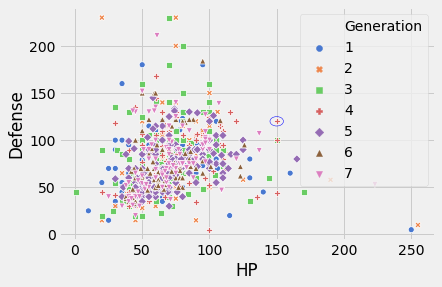

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

cmap = sns.color_palette("muted", n_colors=7)
sns.scatterplot(x='HP', y='Defense',
                data=df,
                hue='Generation',
                style='Generation',
                palette=cmap)

circle2 = plt.Circle((150, 120), 5, color='b', fill=False)
ax = plt.gca()
ax.add_artist(circle2)

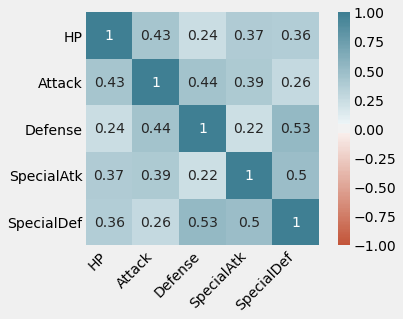

In [ ]:
corr = df.loc[:, 'HP':'SpecialDef'].corr()
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

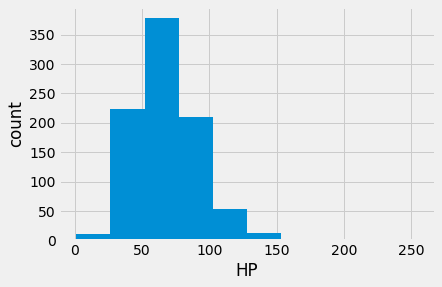

In [ ]:
# 直方圖
plt.hist(df['HP'])
plt.xlabel('HP')
plt.ylabel('count');

In [ ]:
df.loc[:, 'HP':'Speed'].T

,0,1,2,3,4,5,6,7,8,9,...,884,885,886,887,888,889,890,891,892,893
HP,45,60,80,80,39,58,78,78,78,44,...,97,97,97,80,90,67,73,61,53,88
Attack,49,62,82,100,52,64,84,130,104,48,...,157,113,167,95,125,73,73,131,127,112
Defense,49,63,83,123,43,58,78,111,78,65,...,127,109,97,115,80,67,73,211,53,75
SpecialAtk,65,80,100,122,60,80,109,130,159,50,...,113,157,167,130,90,73,127,53,151,102
SpecialDef,65,80,100,120,50,65,85,85,115,64,...,109,127,97,115,90,67,73,101,79,80
Speed,45,60,80,80,65,80,100,100,100,43,...,77,77,129,65,125,73,121,13,107,143


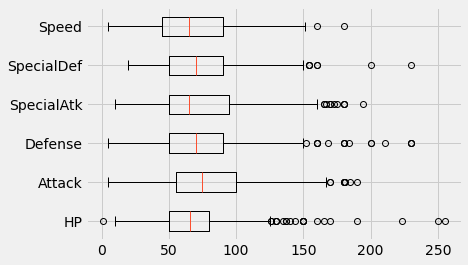

In [ ]:
# 箱型圖(用 matplotlib 繪製有點麻煩，直接用 pandas 比較簡單，而套用 seaborn 則有更多變化)
data = df.loc[:, 'HP':'Speed'].T.values.tolist()
plt.boxplot(data, labels=df.columns[4:10], vert=False);

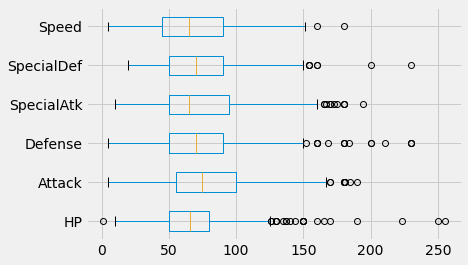

In [ ]:
df.loc[:, 'HP':'Speed'].boxplot(vert=False);

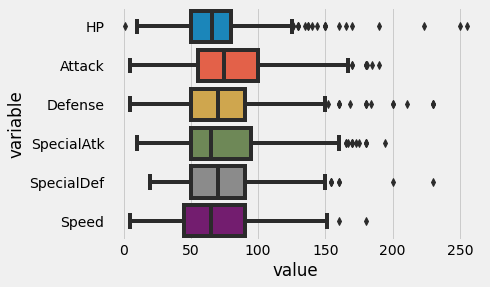

In [ ]:
sns.boxplot(x="value", y="variable", orient='h', data=pd.melt(df.loc[:, 'HP':'Speed'])); # pd.melt()把多個欄位合併成一個

Text(0, 0.5, 'Defense')

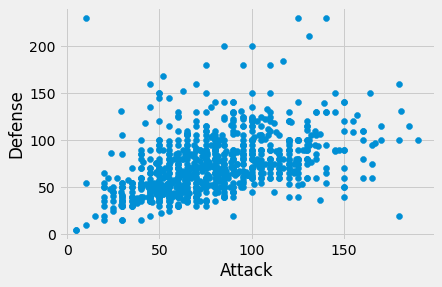

In [ ]:
# 散佈圖
plt.scatter(df['Attack'], df['Defense'], marker='o')
plt.xlabel('Attack')
plt.ylabel('Defense')

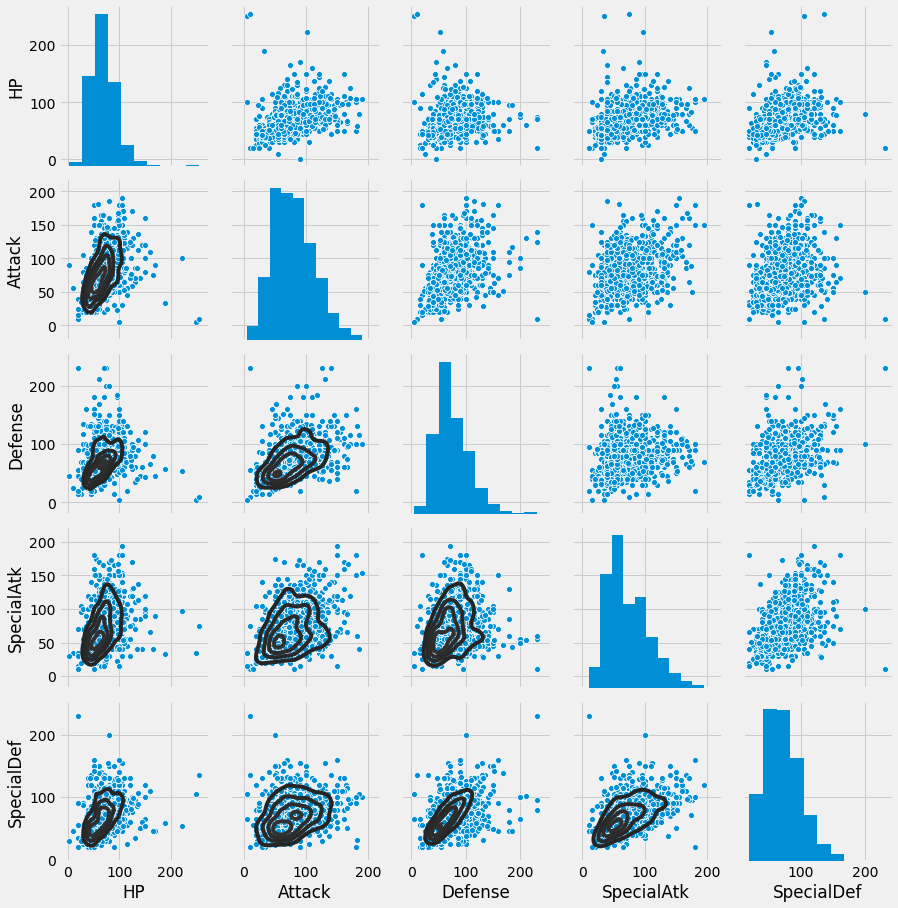

In [ ]:
g = sns.pairplot(df.loc[:, 'HP':'SpecialDef'])
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
df_new = pd.DataFrame(columns=['屬性', '數量', '平均防禦力'])
lst_type1 = ['Bug', 'Electric']
poke = df[df['Type1'] == lst_type1[0]]
df_new.loc[0] = [lst_type1[0], len(poke), poke.Defense.mean()]
poke = df[df['Type1'] == lst_type1[1]]
df_new.loc[1] = [lst_type1[1], len(poke), poke.Defense.mean()]
df_new.head()

,屬性,數量,平均防禦力
0,Bug,78,71.358974
1,Electric,49,66.959184


In [ ]:
df_new = pd.DataFrame(columns=['屬性', '單/雙屬性', '數量', '平均防禦力'])

for i, x in enumerate(lst_type1):
  poke = df[(df['Type1']==x) & (pd.isnull(df['Type2']))]
  df_new.loc[2*i] = [x, '單', len(poke), poke.Defense.mean()]
  poke = df[(df['Type1']==x) & (pd.notnull(df['Type2']))]
  df_new.loc[2*i+1] = [x, '雙', len(poke), poke.Defense.mean()]

df_new

,屬性,單/雙屬性,數量,平均防禦力
0,Bug,單,18,54.833333
1,Bug,雙,60,76.316667
2,Electric,單,29,56.517241
3,Electric,雙,20,82.100000


## 0-4-3 機率

出現次數：
4    180
1    168
6    167
5    164
2    161
3    160
dtype: int64
出現頻率：
 1    0.168
2    0.161
3    0.160
4    0.180
5    0.164
6    0.167
dtype: float64


<BarContainer object of 6 artists>

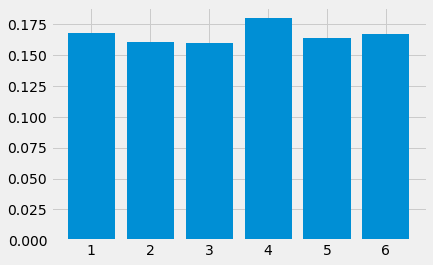

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 均勻分佈(e.g. 擲骰子)
size = 1000
dice = np.random.choice(range(1, 7), size=size, replace=True, p=[1/6]*6)
print('出現次數：')
print(pd.Series(dice).value_counts())

freq = pd.Series(dice).value_counts()/size
freq.sort_index(inplace=True)
print('出現頻率：\n', freq)

plt.bar(range(1, 7), freq)

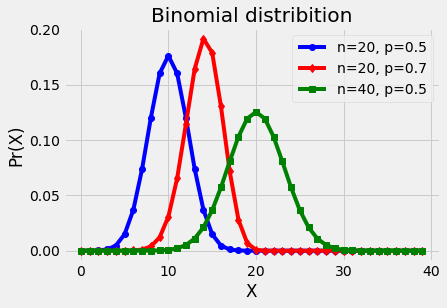

In [ ]:
from scipy import stats

k = np.arange(40)
params = [[20, 0.5], [20, 0.7], [40, 0.5]]
style = ['o-b', 'd-r', 's-g']

for i, param in enumerate(params):
  plt.plot(k, stats.binom(param[0], param[1]).pmf(k), style[i], label='n={}, p={}'.format(param[0], param[1]))

plt.title('Binomial distribition')
plt.legend()
plt.xlabel('X')
plt.ylabel('Pr(X)');

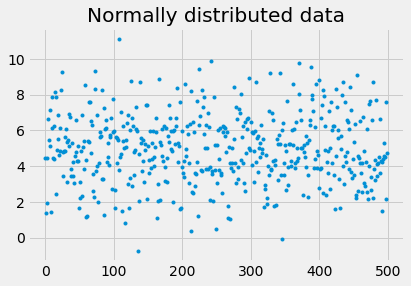

Text(0.5, 1.0, 'Histogram of normally distributed data')

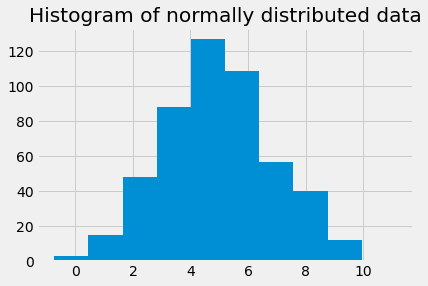

In [ ]:
size = 500
data = stats.norm.rvs(5, 2, size=size)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')

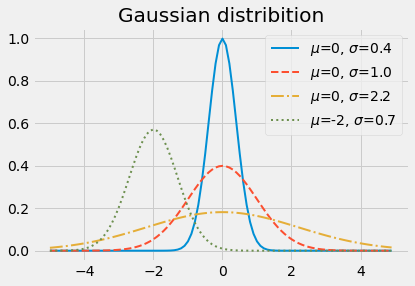

In [ ]:
size = 100
params = [[0, 0.4], [0, 1.], [0, 2.2], [-2, 0.7]]
x = np.arange(-5, 5, 0.1)
style = ['-', '--', '-.', ':']

for i, param in enumerate(params):
  y = stats.norm(param[0], param[1]).pdf(x)
  plt.plot(x, y, lw=2, ls=style[i], label=r'$\mu$={}, $\sigma$={}'.format(param[0], param[1]))

plt.title('Gaussian distribition')
plt.legend();

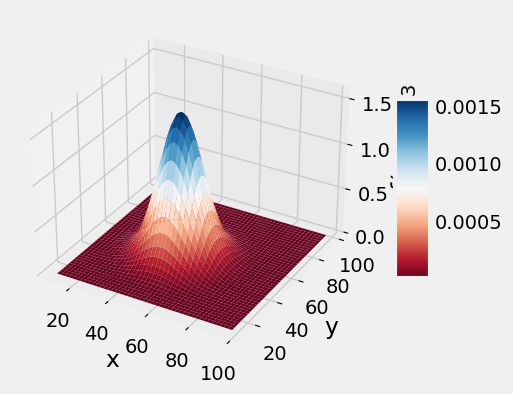

In [ ]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 產生資料
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2,))
pos[:, :, 0], pos[:, :, 1] = x, y

# 設定 x, y 的平均分別為 50, 50
# 共變異矩陣則為 [[100,0], [0,100]]
rv = multivariate_normal([50,50], [[100,0], [0,100]])

# 二元常態分佈的機率密度函數
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.RdBu)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
plt.tight_layout();

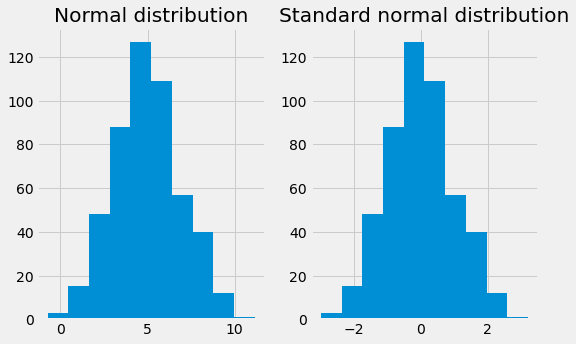

In [ ]:
# 常態分佈
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.hist(data)
plt.title('Normal distribution')

# 標準常態分佈
plt.subplot(1, 2, 2)
data_std = (data-data.mean())/data.std()
plt.hist(data_std)
plt.title('Standard normal distribution');

In [ ]:
tw50 = pd.read_csv('tw50.csv')
print(tw50.head(2))
print(tw50.tail(2))
print('==============')

ret = tw50['ROI']
ret_mean = ret.mean()
ret_std = ret.std()
print('Mean =', ret_mean)
print('Std =', ret_std)
print('==============')

# 查詢累積密度值為 0.05 的分位數
print(stats.norm.ppf(0.05, ret_mean, ret_std))

        Date     Price     ROI
0  2020/9/28  10005.28  0.0198
1  2020/9/25   9810.80  0.0002
           Date    Price     ROI
1223  2015/10/1  6131.52  0.0143
1224  2015/9/30  6044.95  0.0083
Mean = 0.00047012244897959163
Std = 0.010304558547753459
-0.016479368052426484


# Ch 1. 資料前處理

### 1-1-1 數值型數據

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train = np.array([[ 1., -1.,  2.],
          [ 2.,  0.,  0.],
          [ 0.,  1., -1.]])
# 建立標準化縮放器並進行擬合
scaler = StandardScaler().fit(X_train)
scaler.mean_    # 擬合後的平均值

array([1.        , 0.        , 0.33333333])

In [ ]:
scaler.scale_   # 擬合後的標準差

array([0.81649658, 0.81649658, 1.24721913])

In [ ]:
X_train_std = scaler.transform(X_train)    # 標準化轉換
X_train_std

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [ ]:
print("Mean:", X_train_std.mean())
print("Standard deviation:", X_train_std.std())

Mean: 4.9343245538895844e-17
Standard deviation: 1.0


In [ ]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test)    # 轉換其它數據

array([[-2.44948974,  1.22474487, -0.26726124]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train = np.array([[ 1., -1.,  2.],
          [ 2.,  0.,  0.],
          [ 0.,  1., -1.]])
# 建立最小最大縮放器
min_max_scaler = MinMaxScaler()
# 進行擬合後直接轉換
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [ ]:
# 縮放區間改為 [1, 10]
X_train_minmax = MinMaxScaler(feature_range=[1, 10]).fit_transform(X_train)
X_train_minmax

array([[ 5.5,  1. , 10. ],
       [10. ,  5.5,  4. ],
       [ 1. , 10. ,  1. ]])

In [ ]:
from sklearn.preprocessing import RobustScaler

X_train = np.array([[ 1., -2.,  2.],
          [ -2.,  1.,  3.],
          [ 4.,  1., -2.]])
# 建立縮放器
scale = RobustScaler().fit(X_train)
scale.transform(X_train)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

In [ ]:
from sklearn.preprocessing import Normalizer

X_train = np.array([[ 1., -1.,  2.],
          [ 2.,  0.,  0.],
          [ 0.,  1., -1.]])
# 建立正規化縮放器
norm = Normalizer(norm='l2').fit(X_train)
norm.transform(X_train)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
# l1 正規化調整樣本特徵值，其總和為 1
norm = Normalizer(norm='l1').fit(X_train)
norm.transform(X_train)

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

### 1-1-2 類別型數據

In [ ]:
import pandas as pd

df = pd.DataFrame([['小火龍', 'Fire', '39', 'FALSE'],
          ['皮卡丘', 'Electric', '35', 'FALSE'],
          ['超夢', 'Psychic', '106', 'TRUE'],
          ['噴火龍', 'Fire', '78', 'FALSE']])
df.columns = ['Name', 'Type1', 'HP', 'Legendary']
df

,Name,Type1,HP,Legendary
0,小火龍,Fire,39,FALSE
1,皮卡丘,Electric,35,FALSE
2,超夢,Psychic,106,TRUE
3,噴火龍,Fire,78,FALSE


In [ ]:
df_encode = pd.get_dummies(df, columns=['Type1', 'Legendary'])
df_encode

,Name,HP,Type1_Electric,Type1_Fire,Type1_Psychic,Legendary_FALSE,Legendary_TRUE
0,小火龍,39,0,1,0,1,0
1,皮卡丘,35,1,0,0,1,0
2,超夢,106,0,0,1,0,1
3,噴火龍,78,0,1,0,1,0


In [ ]:
df_encode = pd.get_dummies(df, columns=['Type1', 'Legendary'],drop_first=True)
df_encode

,Name,HP,Type1_Fire,Type1_Psychic,Legendary_TRUE
0,小火龍,39,1,0,0
1,皮卡丘,35,0,0,0
2,超夢,106,0,1,1
3,噴火龍,78,1,0,0


In [ ]:
from sklearn.preprocessing import LabelBinarizer
# 建立編碼器並進行擬合
lb = LabelBinarizer().fit(df['Type1'])
lb.transform(df['Type1'])

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 建立編碼器並進行擬合
le = LabelEncoder().fit(df['Type1'])
print(le.transform(df['Type1']))
# 將編碼結果轉回原字串
print(le.inverse_transform([2]))

[1 0 2 1]
['Psychic']


In [ ]:
mapping = {'Psychic':0, 'Electric':1, 'Fire':2}
df['Type1'] = df['Type1'].map(mapping)
df
# cat = pd.Categorical(df['Type1'], categories=['Psychic', 'Electric', 'Fire'])
# labels, uniques = pd.factorize(cat, sort=True)
# labels

,Name,Type1,HP,Legendary
0,小火龍,2,39,FALSE
1,皮卡丘,1,35,FALSE
2,超夢,0,106,TRUE
3,噴火龍,2,78,FALSE


In [ ]:
inv_mapping = {val: key for key, val in mapping.items()}
inv_mapping[1]

'Electric'

### 1-2-1 偵測與刪除遺漏值

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('ex1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Number      168 non-null    int64  
 1   Name        168 non-null    object 
 2   Type1       168 non-null    object 
 3   Type2       79 non-null     object 
 4   HP          166 non-null    float64
 5   Attack      168 non-null    int64  
 6   Defense     168 non-null    int64  
 7   SpecialAtk  168 non-null    int64  
 8   SpecialDef  168 non-null    int64  
 9   Speed       168 non-null    int64  
 10  Generation  168 non-null    int64  
 11  Legendary   168 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(3)
memory usage: 14.7+ KB


In [ ]:
df[df['HP'].isna()]

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,NaN,35,50,55,110,85,2,False


In [ ]:
df.loc[167, 'Type2'] = np.nan
df[df['HP'].isna()]

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,NaN,NaN,35,50,55,110,85,2,False


In [ ]:
# 刪除特徵(行) Type2
print(df.shape)
df_drop = df.drop('Type2', axis=1)
df_drop.head(2)

(168, 12)


,Number,Name,Type1,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,60.0,62,63,80,80,60,1,False


In [ ]:
# 刪除樣本(列)
df_drop = df.dropna()   # 刪除所有含 nan 的列
# df_drop = df.dropna(thresh=11) # 刪除不到 11 個非遺漏值的列
df_drop.shape

(78, 12)

In [ ]:
# 改用取出符合條件的樣本(列)
df_type2 = df[df['Type2'].notna()]
df_type2.shape

(78, 12)

In [ ]:
df[df['HP'].isna()]

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,NaN,NaN,35,50,55,110,85,2,False


### 1-2-2 填補遺漏值

In [ ]:
df.fillna(0).tail(2)    # 填補 0

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,0,0.0,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,0,0.0,35,50,55,110,85,2,False


In [ ]:
df.fillna(method='ffill').tail(3)   # 往後填補

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
165,151,夢幻,Psychic,Fighting,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,Fighting,100.0,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Fighting,100.0,35,50,55,110,85,2,False


In [ ]:
from sklearn.impute import SimpleImputer

# 用眾數進行填補，好處是能填補非數值型數據
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = imp.fit_transform(df)  # 填補後回傳陣列
df_imp = pd.DataFrame(data, columns=df.columns)
df_imp.tail(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
165,151,夢幻,Psychic,Flying,100,100,100,100,100,100,1,False
166,153,月桂葉,Grass,Flying,65,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,65,35,50,55,110,85,2,False


In [ ]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=5)
# 取出所有數值型特徵，再進行填補
data = imp.fit_transform(df.loc[:, 'HP':'Speed'])
df_imp = df
df_imp.loc[:, 'HP':'Speed'] = data
df_imp.tail(2)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,NaN,68.0,62.0,80.0,63.0,80.0,60.0,2,False
167,166,安瓢蟲,Bug,NaN,61.0,35.0,50.0,55.0,110.0,85.0,2,False


### 1-3-1 訓練、驗證與測試集

In [ ]:
from sklearn.model_selection import train_test_split

X = df_imp.loc[:, 'HP':'Speed'] # 特徵
y = df_imp['Type1'] # 目標類別
# 切割數據集，其中
# X_train, y_train -> 訓練集與其類別標籤(比例=0.8)
# X_test, y_test   -> 測試集與其類別標籤(比例=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat([y.value_counts(), y_train.value_counts(), y_test.value_counts()], axis=1)
df_count.columns = ['y', 'y_train', 'y_test']
df_count.head()

,y,y_train,y_test
Water,31,25,6.0
Normal,24,19,5.0
Bug,15,12,3.0
Fire,14,11,3.0
Poison,14,11,3.0


### 1-3-2 k次交叉驗證

In [ ]:
X = df_imp.loc[:, 'HP':'Speed']
y = df_imp['Legendary']         # 目標改為判斷是否為神獸
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
# 分層 k 次
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train)
score_lst = []  # 紀錄 k 次交叉驗證的正確率

for k, (i_train, i_valid) in enumerate(kfold):
  # 初始化 kNN 分類器
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
  # 以驗證集評估正確率
  score = knn.score(X_train.iloc[i_valid, :], y_train.iloc[i_valid])
  score_lst.append(score)
  print('%2d-Fold: Acc=%.3f'%(k+1, score))

print('\n10-fold CV accuracy = %.3f, std = %.3f'%(np.mean(score_lst), np.std(score_lst)))

 1-Fold: Acc=0.929
 2-Fold: Acc=0.929
 3-Fold: Acc=0.929
 4-Fold: Acc=0.929
 5-Fold: Acc=1.000
 6-Fold: Acc=1.000
 7-Fold: Acc=1.000
 8-Fold: Acc=1.000
 9-Fold: Acc=0.923
10-Fold: Acc=0.923

10-fold CV accuracy = 0.956, std = 0.036


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=2)
score_lst = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, n_jobs=-1)
print('10-fold CV accuracy scores\n', score_lst)
print('\n10-fold CV accuracy = %.3f, std = %.3f'%(np.mean(score_lst), np.std(score_lst)))

10-fold CV accuracy scores
 [0.92857143 0.92857143 0.92857143 0.92857143 1.         1.
 1.         1.         1.         0.84615385]

10-fold CV accuracy = 0.956, std = 0.050


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


### 1-4 異常值

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv('ex1.csv')

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = imp.fit_transform(df)
df = pd.DataFrame(data, columns=df.columns)
df.head(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False


In [ ]:
from sklearn.covariance import EllipticEnvelope

X = df.loc[:, 'HP':'Speed']
# 建立偵測器
outlier_detect = EllipticEnvelope(contamination=0.01)
# 擬合並找出離群值
result = outlier_detect.fit_predict(X)
# 取出離群值的索引值(離群值標示為 -1)
idx = np.where(result == -1)[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
98,91,刺甲貝,Water,Ice,50.0,95,180,85,45,70,1,False
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False


In [ ]:
def outlier_idx(x):
  q1, q3 = np.percentile(x, [25, 75])
  IQR = q3 - q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR
  return np.where((x < lower_bound) | (x > upper_bound))

# 找出 HP 的離群值
idx = outlier_idx(df['HP'])[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
45,40,胖可丁,Normal,Fairy,140.0,70,45,85,50,45,1,False
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False
142,131,拉普拉斯,Water,Ice,130.0,85,80,85,95,60,1,False
145,134,水伊布,Water,Flying,130.0,65,60,110,95,65,1,False
155,143,卡比獸,Normal,Flying,160.0,110,65,65,110,30,1,False


In [ ]:
from sklearn.ensemble import IsolationForest

X = df.loc[:, 'HP':'Speed']
clf = IsolationForest(max_samples=df.shape[0], contamination=0.01)
clf.fit(X)
y_pred_train = clf.predict(X)
# 取出離群值的索引值(離群值標示為 -1)
idx = np.where(y_pred_train == -1)[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False
164,150,超夢MegaY,Psychic,Flying,106.0,150,70,194,120,140,1,True


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_train = clf.fit_predict(X)
# 取出離群值的索引值(離群值標示為 -1)
idx = np.where(y_pred_train == -1)[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False
164,150,超夢MegaY,Psychic,Flying,106.0,150,70,194,120,140,1,True


In [ ]:
# 假設檢測到兩個疑似離群值的列索引值
idx = [121, 164]
df_ok = df.iloc[[i for i in df.index if i not in idx], :]
df_ok.shape

(166, 12)

In [ ]:
df['Outlier'] = [1 if i in idx else 0 for i in df.index]
df.take([0] + idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,Outlier
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False,0
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False,1
164,150,超夢MegaY,Psychic,Flying,106.0,150,70,194,120,140,1,True,1


In [ ]:
# 假設兩個離群值位於特徵 HP
df['Log_HP'] = [np.log(x) for x in df['HP']]
df.iloc[[0] + idx, [0, 1, 2, 3, 4, 12, 13]]

,Number,Name,Type1,Type2,HP,Outlier,Log_HP
0,1,妙蛙種子,Grass,Poison,45.0,0,3.806662
121,113,吉利蛋,Normal,Flying,250.0,1,5.521461
164,150,超夢MegaY,Psychic,Flying,106.0,1,4.663439


In [ ]:
df_ok

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,Flying,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
162,150,超夢,Psychic,Flying,106.0,110,90,154,90,130,1,True
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
165,151,夢幻,Psychic,Flying,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,Flying,65.0,62,80,63,80,60,2,False


In [ ]:
from sklearn import svm

# 參數 nu 越小代表決策邊界越大
clf = svm.OneClassSVM(nu=0.01, kernel="rbf")
clf.fit(df_ok.loc[:, 'HP':'Speed'])

# 三筆新觀察值
new = [['152', '小鋸鱷', 'Water', '', '50', '65', '64', '44', '48', '43', '2', 'FALSE'], 
    ['242', '幸福蛋', 'Normal', '', '255', '10', '10', '75', '135', '55', '2', 'FALSE'],
    ['250', '鳳王', 'Fire', 'Flying', '106', '130', '90', '110', '154', '90', '2', 'TRUE']]
df_new = pd.DataFrame(new, columns=df_ok.columns)

# 回傳 1 代表正常值；-1 代表異常值
clf.predict(df_new.loc[:, 'HP':'Speed'])

array([ 1, -1, -1], dtype=int64)

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(df_ok.loc[:, 'HP':'Speed'])
clf.predict(df_new.loc[:, 'HP':'Speed'])

array([ 1, -1, -1])

### 1-5 選取重要特徵

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv('ex1.csv')

imp = SimpleImputer(missing_values=np.nan, strategy='median')
x = df['HP'].values.reshape(-1, 1)
df['HP'] = imp.fit_transform(x)
df.tail(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,62.0,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,62.0,35,50,55,110,85,2,False


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# 產生選取器
selector = VarianceThreshold(threshold=700)
X = df.loc[:, 'HP':'Speed']
# 看每個特徵的變異性
print(selector.fit(X).variances_)
# 丟棄低變異特徵(這裡只有 SpecialDef 被丟棄)
selector.fit_transform(X)[:3]

[ 778.66312358  939.8423682   808.76016865 1166.99603175  649.47785573
  866.7906746 ]


array([[ 45.,  49.,  49.,  65.,  45.],
       [ 60.,  62.,  63.,  80.,  60.],
       [ 80.,  82.,  83., 100.,  80.]])

In [ ]:
# 轉換 Legendary 特徵：True->1、False->0
df['Legendary'] = [1 if x else 0 for x in df.Legendary]
# 新增 hasType2 特徵: 有 Type2->1、無 Type2->0
df['hasType2'] = [0 if x is np.nan else 1 for x in df.Type2]

p = 0.6
selector = VarianceThreshold(threshold=p*(1-p))
print('門檻值 =', p*(1-p))
X = df.loc[:, 'Generation':'hasType2'].values
# 只有 hasType2 特徵會被保留下來
selector.fit(X).variances_

門檻值 = 0.24


array([0.01176304, 0.03443878, 0.24911423])

In [ ]:
X = df.loc[:, 'HP':'Speed'] 
# 產生相關矩陣
corr_matrix = X.corr().abs()
corr_matrix

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,1.000000,0.352144,0.175534,0.264278,0.504488,0.020288
Attack,0.352144,1.000000,0.477838,0.214138,0.431734,0.320103
Defense,0.175534,0.477838,1.000000,0.262892,0.217897,0.026088
SpecialAtk,0.264278,0.214138,0.262892,1.000000,0.546631,0.453567
SpecialDef,0.504488,0.431734,0.217897,0.546631,1.000000,0.445071
Speed,0.020288,0.320103,0.026088,0.453567,0.445071,1.000000


In [ ]:
# 產生矩陣上三角的遮罩
mask = np.ones(corr_matrix.shape).astype(bool)
mask = np.triu(mask, k=1)
# 選取相關矩陣的上三角
upper = corr_matrix.where(mask)
upper

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,NaN,0.352144,0.175534,0.264278,0.504488,0.020288
Attack,NaN,NaN,0.477838,0.214138,0.431734,0.320103
Defense,NaN,NaN,NaN,0.262892,0.217897,0.026088
SpecialAtk,NaN,NaN,NaN,NaN,0.546631,0.453567
SpecialDef,NaN,NaN,NaN,NaN,NaN,0.445071
Speed,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 刪除相關係數 > 0.47 的特徵('Defense', 'SpecialDef')
to_drop = [c for c in upper if any(upper[c] > 0.47)]
df.drop(df[to_drop], axis=1).head(3)

,Number,Name,Type1,Type2,HP,Attack,SpecialAtk,Speed,Generation,Legendary,hasType2
0,1,妙蛙種子,Grass,Poison,45.0,49,65,45,1,0,1
1,2,妙蛙草,Grass,Poison,60.0,62,80,60,1,0,1
2,3,妙蛙花,Grass,Poison,80.0,82,100,80,1,0,1


In [ ]:
from scipy import stats
# 點二列相關(point-biserial correlation)，用以衡量連續變數與二元類別變數的相關性
print(stats.pointbiserialr(df['HP'], df['hasType2']))
# 皮爾森相關係數 => 兩個結果相同
df.loc[:, ['HP','hasType2']].corr()

PointbiserialrResult(correlation=0.08285622146815766, pvalue=0.2856294970000373)


,HP,hasType2
HP,1.000000,0.082856
hasType2,0.082856,1.000000


In [ ]:
# 產生斯皮爾曼相關矩陣
corr_matrix = X.corr(method='spearman')
corr_matrix

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,1.000000,0.564247,0.419371,0.389530,0.583880,0.112199
Attack,0.564247,1.000000,0.550218,0.196540,0.424258,0.293070
Defense,0.419371,0.550218,1.000000,0.321829,0.299292,0.016637
SpecialAtk,0.389530,0.196540,0.321829,1.000000,0.572246,0.402310
SpecialDef,0.583880,0.424258,0.299292,0.572246,1.000000,0.454588
Speed,0.112199,0.293070,0.016637,0.402310,0.454588,1.000000


In [ ]:
# 計算斯皮爾曼相關係數與 p值
stats.spearmanr(df['HP'], df['Attack'])

SpearmanrResult(correlation=0.5642473841533602, pvalue=1.6544873304447606e-15)

In [ ]:
# 計算肯德爾相關係數與 p值
print(stats.kendalltau(df['HP'], df['Attack']))
# 產生肯德爾相關矩陣
corr_matrix = X.corr(method='kendall')
corr_matrix

KendalltauResult(correlation=0.41534787560519015, pvalue=1.2538513443744389e-14)


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,1.000000,0.415348,0.322465,0.281925,0.441446,0.076019
Attack,0.415348,1.000000,0.399782,0.136697,0.307479,0.203907
Defense,0.322465,0.399782,1.000000,0.239553,0.235209,0.006498
SpecialAtk,0.281925,0.136697,0.239553,1.000000,0.444924,0.293127
SpecialDef,0.441446,0.307479,0.235209,0.444924,1.000000,0.318700
Speed,0.076019,0.203907,0.006498,0.293127,0.318700,1.000000


In [ ]:
col = [df.columns[-1]] + list(df.columns[4:-1])
X = df.loc[:, col]
corr_matrix = X.corr(method='kendall')
corr_matrix

,hasType2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
hasType2,1.000000,0.125690,0.087135,0.145104,0.167511,0.057040,-0.019050,0.006545,0.075740
HP,0.125690,1.000000,0.415348,0.322465,0.281925,0.441446,0.076019,0.000000,0.223976
Attack,0.087135,0.415348,1.000000,0.399782,0.136697,0.307479,0.203907,-0.094959,0.184349
Defense,0.145104,0.322465,0.399782,1.000000,0.239553,0.235209,0.006498,-0.012270,0.143693
SpecialAtk,0.167511,0.281925,0.136697,0.239553,1.000000,0.444924,0.293127,-0.026957,0.235489
SpecialDef,0.057040,0.441446,0.307479,0.235209,0.444924,1.000000,0.318700,0.093204,0.198988
Speed,-0.019050,0.076019,0.203907,0.006498,0.293127,0.318700,1.000000,0.005656,0.193095
Generation,0.006545,0.000000,-0.094959,-0.012270,-0.026957,0.093204,0.005656,1.000000,-0.021124
Legendary,0.075740,0.223976,0.184349,0.143693,0.235489,0.198988,0.193095,-0.021124,1.000000


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# 將數值特徵離散化
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_bin = est.fit_transform(df.loc[:, 'HP':'Speed'])

X = df.loc[:, 'HP':'Generation']
X.loc[:, 'HP':'Speed'] = X_bin
y = df['hasType2']
# 選取 k=2 個卡方統計量最高的特徵
selector = SelectKBest(chi2, k=2)
X_kbest = selector.fit_transform(X, y)

print(X_kbest[:4,:])  # 選出 Defense 與 SpecialAtk
print(chi2(X, y))   # 輸出卡方統計量與 p值
X.head(4)

[[2. 2.]
 [3. 3.]
 [4. 4.]
 [6. 5.]]
(array([1.24269663e+00, 1.91258104e+00, 4.71224147e+00, 7.98876404e+00,
       1.19673045e+00, 8.19822675e-02, 8.36631054e-05]), array([0.26495198, 0.16667683, 0.02994858, 0.00470685, 0.27397614,
       0.77462886, 0.99270205]))


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation
0,1.0,2.0,2.0,2.0,4.0,2.0,1
1,2.0,3.0,3.0,3.0,5.0,3.0,1
2,2.0,4.0,4.0,4.0,7.0,4.0,1
3,2.0,5.0,6.0,5.0,9.0,4.0,1


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

X = df.loc[:, 'HP':'Speed']
y = df['hasType2']
# 選取前 50% F值最高的特徵
selector = SelectPercentile(f_classif, percentile=50)
X_pbest = selector.fit_transform(X, y)

print(X_pbest[:4,:])   # 選出 Attack, Defense, SpecialDef
print(f_classif(X, y)) # 輸出 F值與 p值
X.head(4)

[[ 49.  49.  65.]
 [ 62.  63.  80.]
 [ 82.  83. 100.]
 [100. 123. 122.]]
(array([1.14749319, 2.97372848, 6.84241862, 5.48589059, 0.7838129 ,
       0.14165011]), array([0.2856295 , 0.08648805, 0.00972243, 0.02035716, 0.37725819,
       0.70712666]))


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,45.0,49,49,65,65,45
1,60.0,62,63,80,80,60
2,80.0,82,83,100,100,80
3,80.0,100,123,122,120,80


In [ ]:
from sklearn.feature_selection import mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=50)
X_pbest = selector.fit_transform(X, y)
print(X_pbest[:4,:])   # 選出 Attack, SpecialAtk, SpecialDef
print(mutual_info_classif(X, y)) # 輸出 MI值

[[ 49.  65.  65.]
 [ 62.  80.  80.]
 [ 82. 100. 100.]
 [100. 122. 120.]]
[0.         0.03685285 0.         0.07544646 0.01753647 0.        ]


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = df.loc[:, 'HP':'Speed'] 
y = df['hasType2']
# 以邏輯斯迴歸預測是否有雙屬性
model = LogisticRegression()
selector = RFECV(model, step=1, cv=5, scoring='accuracy')
selector = selector.fit(X, y)

print('最佳特徵數：', selector.n_features_)
print('哪些類型最佳：', selector.support_)
print('特徵排名(1最好)：', selector.ranking_)
X.columns[selector.support_]

最佳特徵數： 5
哪些類型最佳： [False  True  True  True  True  True]
特徵排名(1最好)： [2 1 1 1 1 1]


Index(['Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
plt.style.use('fivethirtyeight')

# 利用 kNN 預測 HP
X, y = df.loc[:, 'Attack':'hasType2'], df['HP']
model = KNeighborsRegressor()
model.fit(X, y)

selector = permutation_importance(model, X, y, n_repeats=10, scoring='neg_mean_squared_error', n_jobs=-1)

importance = selector.importances_mean
std = selector.importances_std
# 按特徵重要性排序
idx = np.argsort(importance)[::-1]
print("特徵重要性排序：")
for c in range(X.shape[1]):
  print('%d. %s' % (c+1, X.columns[idx[c]]), end='')
  print('\t (feature %d: %f)' % (idx[c], importance[idx[c]]))


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


特徵重要性排序：
1. Attack	 (feature 0: 184.058952)
2. SpecialDef	 (feature 3: 158.866690)
3. Speed	 (feature 4: 113.976619)
4. Defense	 (feature 1: 105.848571)
5. SpecialAtk	 (feature 2: 95.775810)
6. hasType2	 (feature 7: 0.535714)
7. Legendary	 (feature 6: 0.000000)
8. Generation	 (feature 5: 0.000000)


(-1, 8)

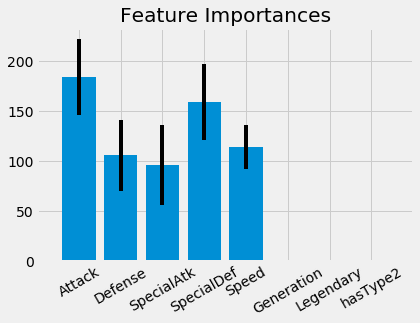

In [ ]:
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance, yerr=std)
plt.xticks(range(X.shape[1]), X.columns, rotation=30)
plt.xlim([-1, X.shape[1]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 利用 kNN 預測 hasType2
X, y = df.loc[:, 'HP':'Legendary'], df['hasType2']
model = KNeighborsClassifier().fit(X, y)

selector = permutation_importance(model, X, y, n_repeats=10, scoring='accuracy', n_jobs=-1)

importance = selector.importances_mean
std = selector.importances_std
# 按特徵重要性排序
idx = np.argsort(importance)[::-1]
print("特徵重要性排序：")
for c in range(X.shape[1]):
  print('%d. %s' % (c+1, X.columns[idx[c]]), end='')
  print('\t (feature %d: %f)' % (idx[c], importance[idx[c]]))

特徵重要性排序：
1. SpecialAtk	 (feature 3: 0.073810)
2. Speed	 (feature 5: 0.061310)
3. Defense	 (feature 2: 0.057738)
4. Attack	 (feature 1: 0.039881)
5. HP	 (feature 0: 0.036905)
6. SpecialDef	 (feature 4: 0.017857)
7. Legendary	 (feature 7: 0.000000)
8. Generation	 (feature 6: 0.000000)


(-1, 8)

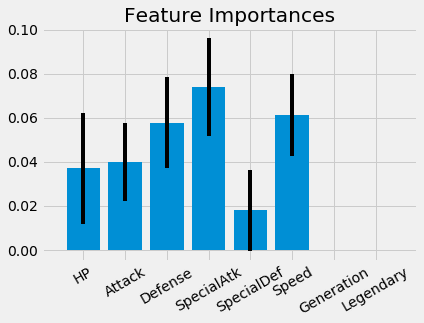

In [ ]:
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance, yerr=std)
plt.xticks(range(X.shape[1]), X.columns, rotation=30)
plt.xlim([-1, X.shape[1]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# 利用 kNN 預測 hasType2
X, y = df.loc[:, 'HP':'Legendary'], df['hasType2']
X_std = StandardScaler().fit_transform(X)
# 先將特徵標準化，得到的結果比較穩定
model = KNeighborsClassifier().fit(X_std, y)
selector = permutation_importance(model, X_std, y, n_repeats=10, scoring='accuracy', n_jobs=-1)

importance = selector.importances_mean
std = selector.importances_std
# 按特徵重要性排序
idx = np.argsort(importance)[::-1]
print("特徵重要性排序：")
for c in range(X.shape[1]):
  print('%d. %s' % (c+1, X.columns[idx[c]]), end='')
  print('\t (feature %d: %f)' % (idx[c], importance[idx[c]]))

特徵重要性排序：
1. Speed	 (feature 5: 0.085119)
2. Defense	 (feature 2: 0.073214)
3. Attack	 (feature 1: 0.058333)
4. SpecialAtk	 (feature 3: 0.050000)
5. HP	 (feature 0: 0.048214)
6. SpecialDef	 (feature 4: 0.039881)
7. Legendary	 (feature 7: 0.023810)
8. Generation	 (feature 6: -0.006548)


(-1, 8)

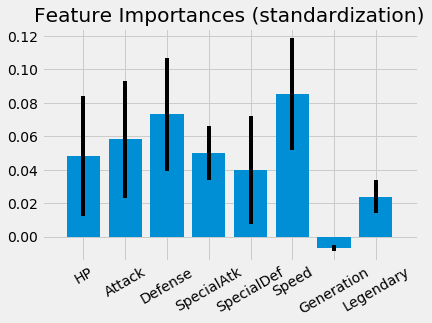

In [ ]:
plt.title("Feature Importances (standardization)")
plt.bar(range(X.shape[1]), importance, yerr=std)
plt.xticks(range(X.shape[1]), X.columns, rotation=30)
plt.xlim([-1, X.shape[1]])

# Ch 2. 監督式學習 : 迴歸

### 2-1 線性迴歸

#### 2-1-1 簡單線性迴歸

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

house = load_boston()
df = pd.DataFrame(data=house.data, columns=house.feature_names)
df['MEDV'] = house.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
# 敘述性統計
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# 檢查是否有遺漏值(也可用 df.info())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

w_1 = [9.10210898]
w_0 = [-34.67062078]


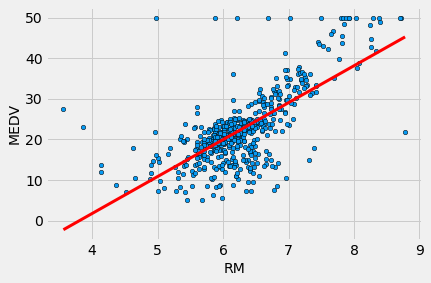

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')

x, y = df.loc[:, ['RM']], df.loc[:, ['MEDV']]
lr = LinearRegression()
lr.fit(x, y)
print('w_1 =', lr.coef_[0])
print('w_0 =', lr.intercept_)

plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=20)
plt.xlabel('RM', fontsize=14)
plt.ylabel("MEDV", fontsize=14)
# 繪製迴歸線
n_x = np.linspace(x.min(), x.max(), 100)
n_y = lr.intercept_ + lr.coef_[0] * n_x
plt.plot(n_x, n_y, color='r', lw=3);

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

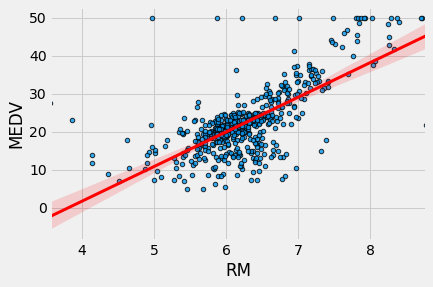

In [ ]:
# 透過 seaborn 可更簡單地繪製迴歸線
import seaborn as sns

# 預設會在迴歸線旁繪製 95% 的信賴區間
sns.regplot(x='RM', y='MEDV', data=df, scatter_kws={'facecolor':'xkcd:azure', 'edgecolor':'black', 's':20}, line_kws={'color':'r', 'lw':3})

w_1 = [0.69535995]
w_0 = [-4.43892061e-16]


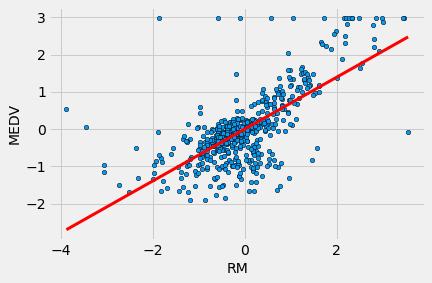

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

lr = LinearRegression()
lr.fit(x, y)
print('w_1 =', lr.coef_[0])
print('w_0 =', lr.intercept_)

plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=20)
plt.xlabel('RM', fontsize=14)
plt.ylabel("MEDV", fontsize=14)
# 繪製迴歸線
n_x = np.linspace(x.min(), x.max(), 100)
n_y = lr.intercept_ + lr.coef_[0] * n_x
plt.plot(n_x, n_y, color='r', lw=3)
plt.show()

#### 2-1-2 多元線性迴歸

In [ ]:
from sklearn.linear_model import LinearRegression

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
lr = LinearRegression()
lr.fit(X, y)
print('[w_1, w_2] =', lr.coef_[0])
print('w_0 =', lr.intercept_)

[w_1, w_2] = [ 5.09478798 -0.64235833]
w_0 = [-1.35827281]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif['feature'] = df.columns
df_vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
df_vif

,feature,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


In [ ]:
# 新增一行，用常數填充
df['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = df.columns
df_vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

,feature,VIF
0,CRIM,1.831537
1,ZN,2.352186
2,INDUS,3.992503
3,CHAS,1.095223
4,NOX,4.586920
5,RM,2.260374
6,AGE,3.100843
7,DIS,4.396007
8,RAD,7.808198
9,TAX,9.205542


In [ ]:
# 新增一行，用常數填充
df['constant'] = 1
df1 = df.drop('TAX', axis=1) # 移除 TAX 
df_vif = pd.DataFrame()
df_vif['feature'] = df1.columns
df_vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

,feature,VIF
0,CRIM,1.829538
1,ZN,2.216337
2,INDUS,3.235660
3,CHAS,1.084627
4,NOX,4.578751
5,RM,2.260029
6,AGE,3.098057
7,DIS,4.392557
8,RAD,2.898743
9,PTRATIO,1.991741


In [ ]:
# 新增一行，用常數填充
df['constant'] = 1
df['new_DIS'] = np.log(df['RAD'])
df['new_TAX'] = np.log(df['TAX'])
df1 = df.drop(['TAX', 'RAD'], axis=1)
df_vif = pd.DataFrame()
df_vif['feature'] = df1.columns
df_vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
df_vif

,feature,VIF
0,CRIM,1.715444
1,ZN,2.370558
2,INDUS,3.750080
3,CHAS,1.092504
4,NOX,4.547445
5,RM,2.249681
6,AGE,3.094001
7,DIS,4.401220
8,PTRATIO,1.853978
9,B,1.372018


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
components = pca.fit_transform(df)
df_comp = pd.DataFrame(data=components, columns=list('12345678'))
vif = pd.DataFrame()
vif["feature"] = df_comp.columns
vif["VIF"] = [variance_inflation_factor(df_comp.values, i) for i in range(df_comp.shape[1])]
vif

,feature,VIF
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0


In [ ]:
import statsmodels.api as sm

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X)
result = model.fit()
print('迴歸係數：', result.params)
result.summary()

迴歸係數： const   -1.358273
RM       5.094788
LSTAT   -0.642358
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          7.01e-112
Time:                        16:14:39   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2-2 模型評估

#### 2-2-1 評估指標

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [ ]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('MSE(training): %.3f, MSE(testing): %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE(training): 28.790, MSE(testing): 37.383


In [ ]:
from sklearn.metrics import r2_score

print('R^2(training): %.3f, R^2(testing): %.3f' %( 
    r2_score(y_train, y_train_pred), 
    r2_score(y_test, y_test_pred)))

R^2(training): 0.662, R^2(testing): 0.541


In [ ]:
# 1.增加自變數
# 隨機增加無關的 4 個特徵(數值介於 0~1 之間)
np.random.seed(0)
rand_n = np.random.rand(X.shape[0], 4)
df_rand = pd.DataFrame(data=rand_n, columns=list('ABCD'))
X = pd.concat([X, df_rand], axis=1)

def linReg_R2(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  lr = LinearRegression().fit(X_train, y_train)
  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)
  print('R^2(training): %.3f, R^2(testing): %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

print(X.shape)
print('=== 1.隨機增加無關的 4 個特徵 ===')
linReg_R2(X, y)

(506, 6)
=== 1.隨機增加無關的 4 個特徵 ===
R^2(training): 0.663, R^2(testing): 0.542


In [ ]:
# 2.擴大數據點的分布範圍
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X.loc[len(X)] = [50, 100]
y.loc[len(y)] = [200]

print(X.shape)
print('=== 2.增加 1 筆數據 ===')
linReg_R2(X, y)

(507, 2)
=== 2.增加 1 筆數據 ===
R^2(training): 0.658, R^2(testing): 0.906


In [ ]:
# 3.減少樣本數
X_y = df.loc[:, ['RM','LSTAT', 'MEDV']]
df_group = X_y.groupby(['MEDV'])

lst = []
for name, _ in df_group:
  lst.append(df_group.get_group(name).mean().tolist())

df_new = pd.DataFrame(data=lst, columns=['RM','LSTAT', 'MEDV'])
X, y = df_new.loc[:, ['RM','LSTAT']], df_new.loc[:, ['MEDV']]

print(df_new.shape)
print('=== 3.減少樣本數 ===')
linReg_R2(X, y)

(229, 3)
=== 3.減少樣本數 ===
R^2(training): 0.827, R^2(testing): 0.872


In [ ]:
# 利用公式計算 Adj. R^2
def adj_R2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

def linReg_adj_R2(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  lr = LinearRegression().fit(X_train, y_train)
  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)
  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)
  print('Adj. R^2(training): %.3f, Adj. R^2(testing): %.3f' %(adj_R2(r2_train, X_train.shape[0], X_train.shape[1]), adj_R2(r2_test, X_test.shape[0], X_test.shape[1])))
    
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

print(X.shape)
print('=== 原始數據 ===')
linReg_adj_R2(X, y)

np.random.seed(0)
rand_n = np.random.rand(X.shape[0], 4)
df_rand = pd.DataFrame(data=rand_n, columns=list('ABCD'))
X = pd.concat([X, df_rand], axis=1)

print(X.shape)
print('=== 隨機增加無關的 4 個特徵 ===')
linReg_adj_R2(X, y)

(506, 2)
=== 原始數據 ===
Adj. R^2(training): 0.660, Adj. R^2(testing): 0.532
(506, 6)
=== 隨機增加無關的 4 個特徵 ===
Adj. R^2(training): 0.658, Adj. R^2(testing): 0.513


#### 2-2-2 殘差分析

Shapiro-Wilk 檢定(SW test)

In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X).fit()

# Shapiro-Wilk 常態性檢定
stat, p = shapiro(model.resid)
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
  print('看起來是常態分布（無法拒絕H0）')
else:
  print('看起來不是常態分布（拒絕H0）')

Statistics: 0.910, p-value: 0.000
看起來不是常態分布（拒絕H0）


Kolmogorov-Smirnov 檢定(KS test)

In [ ]:
from scipy.stats import kstest

# Kolmogorov-Smirnov 常態性檢定
stat, p = kstest(model.resid, 'norm')
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
  print('看起來是常態分布（無法拒絕H0）')
else:
  print('看起來不是常態分布（拒絕H0）')

Statistics: 0.379, p-value: 0.000
看起來不是常態分布（拒絕H0）


D’Agostino-Pearson omnibus 檢定

In [ ]:
from scipy.stats import normaltest

# D’Agostino-Pearson omnibus 常態性檢定
stat, p = normaltest(model.resid)
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
  print('看起來是常態分布（無法拒絕H0）')
else:
  print('看起來不是常態分布（拒絕H0）')

Statistics: 145.712, p-value: 0.000
看起來不是常態分布（拒絕H0）


Jarque-Bera 檢定(JB test))

In [ ]:
from scipy.stats import jarque_bera

# Jarque-Bera 常態性檢定
stat, p = jarque_bera(model.resid)
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
  print('看起來是常態分布（無法拒絕H0）')
else:
  print('看起來不是常態分布（拒絕H0）')

Statistics: 457.690, p-value: 0.000
看起來不是常態分布（拒絕H0）


QQ 圖

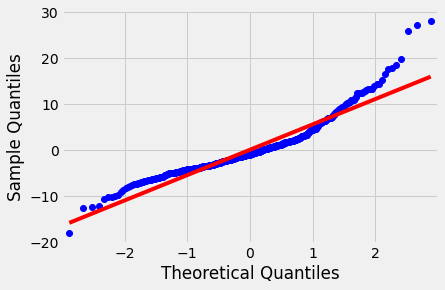

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s');

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print('dw: %.3f' % dw)

if 2 <= dw <= 4:
  print('誤差項獨立')
elif 0 <= dw < 2:
  print('誤差項不獨立')
else:
  print('計算錯誤')

dw: 0.834
誤差項不獨立


Text(0, 0.5, 'Residual (standardization)')

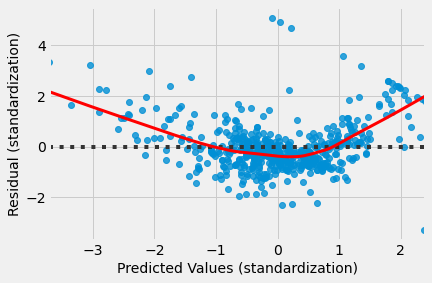

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)

### 2-3 正規化迴歸

#### 2-3-1 脊迴歸

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

house = load_boston()
df = pd.DataFrame(data=house.data, columns=house.feature_names)
df['MEDV'] = house.target

# 進行標準化
scalar = StandardScaler()
X = scalar.fit_transform(df.iloc[:, :-1])
y = scalar.fit_transform(df.loc[:, ['MEDV']])
X[:1, :]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
plt.style.use('fivethirtyeight')

# 利用交叉驗證找出最佳 alpha
alphas = np.logspace(-3, 3, 50)
reg_cv = RidgeCV(alphas, store_cv_values=True)
reg_cv.fit(X, y)
print('Best alpha: %.3f' % reg_cv.alpha_)

Best alpha: 4.715


(0.001, 1000.0)

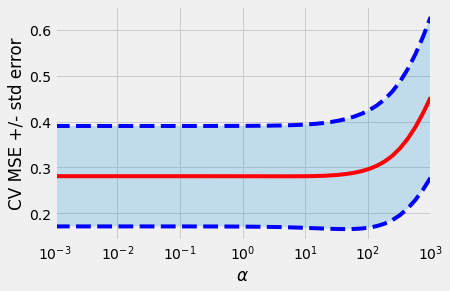

In [ ]:
scores = np.mean(reg_cv.cv_values_, axis=0)[0]
scores_std = np.std(reg_cv.cv_values_, axis=0)[0]

# 設定 x 軸為對數
plt.semilogx(alphas, scores, color='red')

# 繪製 MSE +/- 標準誤(std error)
std_error = scores_std / np.sqrt(len(scores))
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')
plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$')
plt.xlim([alphas[0], alphas[-1]])

In [ ]:
from sklearn.metrics import mean_squared_error

reg = Ridge(alpha=reg_cv.alpha_)
y_pred = reg.fit(X, y).predict(X)
print('MSE =', mean_squared_error(y, y_pred))

MSE = 0.2595894891187877


In [ ]:
# 因為已經標準化，所以把截距拿掉
model = Ridge(alpha=reg_cv.alpha_, fit_intercept=False)
model.fit(X, y)
df_coef = pd.DataFrame(data=model.coef_, columns=df.columns[:-1])
df_coef

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.097095,0.110543,0.004554,0.075748,-0.210387,0.295029,-0.000851,-0.324567,0.25692,-0.195713,-0.220271,0.09221,-0.401026


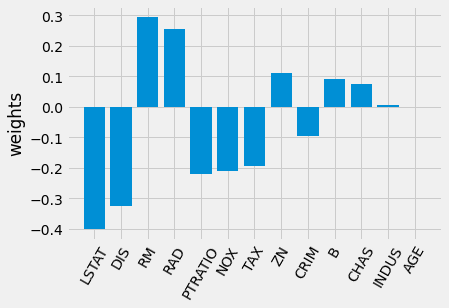

In [ ]:
coef = np.array(df_coef)[0]
# 依迴歸係數的絕對值排序(由大到小)
coef_abs = np.apply_along_axis(abs, 0, coef)
idx = np.argsort(-coef_abs)

plt.bar(range(len(coef)), coef[idx])
plt.xticks(range(len(coef)), df_coef.columns[idx], rotation=60)
plt.ylabel('weights');

#### 2-3-2 套索迴歸

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

alphas = np.logspace(-5, 3, 50)
reg_cv = LassoCV(alphas=alphas, cv=10, n_jobs=-1)
reg_cv.fit(X, y.reshape(-1))
print('Best alpha: %.3f' % reg_cv.alpha_)

Best alpha: 0.018


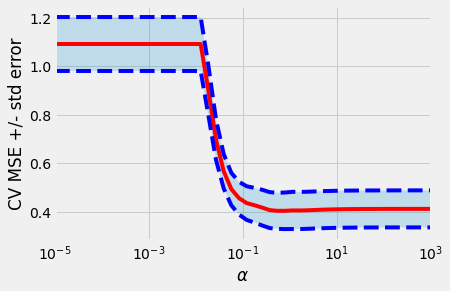

In [ ]:
scores = np.mean(reg_cv.mse_path_, axis=1)
scores_std = np.std(reg_cv.mse_path_, axis=1)

# 設定 x 軸為對數
plt.semilogx(alphas, scores, color='red')

# 繪製 MSE +/- 標準誤(std error)
std_error = scores_std / np.sqrt(len(scores))
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')
plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$')
plt.xlim([alphas[0], alphas[-1]]);

In [ ]:
# 因為已經標準化，所以把截距拿掉
model = Lasso(alpha=reg_cv.alpha_, fit_intercept=False)
model.fit(X, y)
df_coef = pd.DataFrame(data=model.coef_.reshape(1,-1), columns=df.columns[:-1])
df_coef

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.046595,0.049176,-0.009904,0.069666,-0.135755,0.31885,-0.0,-0.211611,0.020489,-0.000186,-0.199043,0.076351,-0.404717


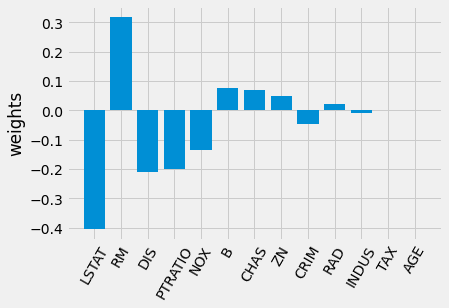

In [ ]:
coef = np.array(df_coef)[0]
# 依迴歸係數的絕對值排序(由大到小)
coef_abs = np.apply_along_axis(abs, 0, coef)
idx = np.argsort(-coef_abs)

plt.bar(range(len(coef)), coef[idx])
plt.xticks(range(len(coef)), df_coef.columns[idx], rotation=60)
plt.ylabel('weights');

#### 2-3-3 彈性網

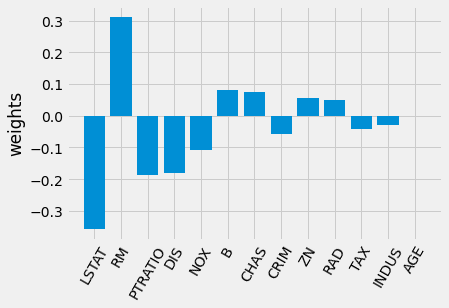

In [ ]:
from sklearn.linear_model import ElasticNetCV
# 僅設定 rho 的範圍，alpha 的範圍採自動設定
rho = [.1, .5, .7, .9, .95, .99, 1]
reg_cv = ElasticNetCV(cv=10, l1_ratio=rho)
reg_cv.fit(X, y.reshape(-1))

df_coef = pd.DataFrame(data=reg_cv.coef_.reshape(1,-1), columns=df.columns[:-1])
coef = np.array(df_coef)[0]
# 依迴歸係數的絕對值排序(由大到小)
coef_abs = np.apply_along_axis(abs, 0, coef)
idx = np.argsort(-coef_abs)

plt.bar(range(len(coef)), coef[idx])
plt.xticks(range(len(coef)), df_coef.columns[idx], rotation=60)
plt.ylabel('weights');

### 2-4 多項式迴歸

#### 2-4-2 多項式迴歸

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
plt.style.use('fivethirtyeight')

house = load_boston()
df = pd.DataFrame(data=house.data, columns=house.feature_names)
df['MEDV'] = house.target

x, y = df[['LSTAT']].values, df['MEDV'].values
x[:3, :]

array([[4.98],
       [9.14],
       [4.03]])

#### ex. 三個多項式迴歸模型

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def adj_r2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

r2_lst, mse_lst, y_plot_lst = [None], [None], [None]
# 產生繪圖的 x 座標
x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1,1)

def reg_r2_mse(x, y, deg):
    # 產生 deg 次多項式特徵
    pol_d = PolynomialFeatures(degree=deg)
    x = pol_d.fit_transform(x)
    lr = LinearRegression()
    lr = lr.fit(x, y)
    y_pred = lr.predict(x)
    r2_lst.append(adj_r2(r2_score(y, y_pred), x.shape[0], 1))
    y_plot_lst.append(lr.predict(pol_d.fit_transform(x_plot)))

reg_r2_mse(x, y, 1)
reg_r2_mse(x, y, 2)
reg_r2_mse(x, y, 3)
r2_lst  # 三個迴歸模型的 Adj. R

[None, 0.5432418259547068, 0.6400040338643826, 0.657168766860583]

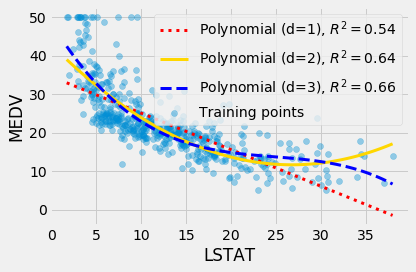

In [ ]:
plt.scatter(x, y, label='Training points', alpha=.4)

plt.plot(x_plot, y_plot_lst[1], 
    color='red', lw=3, linestyle=':', 
    label='Polynomial (d=1), $R^2=%.2f$' % r2_lst[1])

plt.plot(x_plot, y_plot_lst[2],
    color='gold', lw=3, linestyle='-',
    label='Polynomial (d=2), $R^2=%.2f$' % r2_lst[2])

plt.plot(x_plot, y_plot_lst[3],
    color='blue', lw=3, linestyle='--',
    label='Polynomial (d=3), $R^2=%.2f$' % r2_lst[3])

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.tight_layout()

R^2(train): 0.7799761809404298
R^2(test): 0.6529851164348724


Text(0, 0.5, 'Residual')

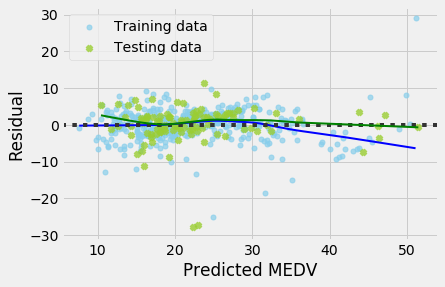

In [ ]:
# 殘差圖

import seaborn as sns
from sklearn.model_selection import train_test_split

X = df.loc[:, ['RM', 'LSTAT']].values
y = df['MEDV'].values

pol_d = PolynomialFeatures(degree=2)
X_poly = pol_d.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
r2 = adj_r2(r2_score(y_train, y_train_pred), X.shape[0], X.shape[1])
print('R^2(train):', r2)
r2 = adj_r2(r2_score(y_test, y_test_pred), X.shape[0], X.shape[1])
print('R^2(test):', r2)

y_train_resid = y_train_pred - y_train
y_test_resid = y_test_pred - y_test 

sns.residplot(y_train_pred, y_train_resid, lowess=True, 
      color="skyblue", label='Training data', 
      scatter_kws={'s': 25, 'alpha':0.7}, 
      line_kws={'color': 'b', 'lw':2})
sns.residplot(y_test_pred, y_test_resid, lowess=True, 
      color="yellowgreen", label='Testing data', 
      scatter_kws={'s': 25, 'marker':'x'}, 
      line_kws={'color': 'g', 'lw':2})
plt.legend()
plt.xlabel('Predicted MEDV')
plt.ylabel('Residual')

#### 2-4-3 隨機森林迴歸

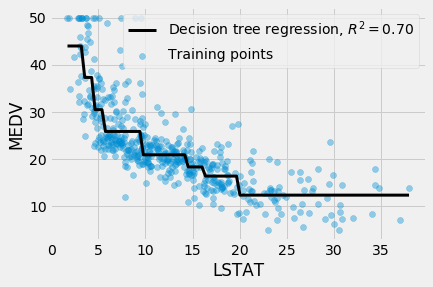

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x, y = df[['LSTAT']].values, df['MEDV'].values
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x, y)
y_pred = reg.predict(x)
r2 = adj_r2(r2_score(y, y_pred), x.shape[0], 1)

x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_plot = reg.predict(x_plot)
plt.scatter(x, y, label='Training points', alpha=.4)
plt.plot(x_plot, y_plot, 
    color='black', lw=3, linestyle='-', 
    label='Decision tree regression, $R^2=%.2f$' % r2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()

R^2(train): 0.9827493820476455
R^2(test): 0.9745681993842027


Text(0, 0.5, 'Residual')

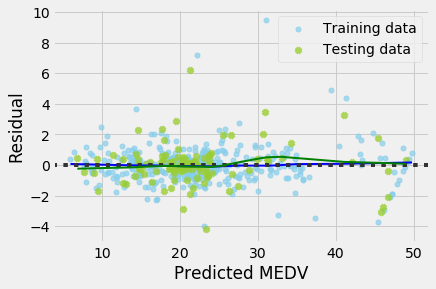

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = RandomForestRegressor(n_estimators=100,# default 
               criterion='mse', # default
               random_state=0, 
               n_jobs=-1)
reg.fit(X, y)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
r2 = adj_r2(r2_score(y_train, y_train_pred), X.shape[0], X.shape[1])
print('R^2(train):', r2)
r2 = adj_r2(r2_score(y_test, y_test_pred), X.shape[0], X.shape[1])
print('R^2(test):', r2)

y_train_resid = y_train_pred - y_train
y_test_resid = y_test_pred - y_test 

sns.residplot(y_train_pred, y_train_resid, lowess=True, 
      color="skyblue", label='Training data', 
      scatter_kws={'s': 25, 'alpha':0.7}, 
      line_kws={'color': 'b', 'lw':2})
sns.residplot(y_test_pred, y_test_resid, lowess=True, 
      color="yellowgreen", label='Testing data', 
      scatter_kws={'s': 25, 'marker':'x'}, 
      line_kws={'color': 'g', 'lw':2})
plt.legend()
plt.xlabel('Predicted MEDV')
plt.ylabel('Residual')

# Ch 3. 監督式學習 : 分類

### 3-2 OvR vs OvO

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train[:2, :]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2]])

In [ ]:
from sklearn.linear_model import LogisticRegression

# 建立邏輯斯迴歸模型(預設為 OvR 策略)
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

0.9473684210526315

In [ ]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
logit = LogisticRegression()

# OvR策略應用二元分類器到多元分類，初始化需傳入分類的模型
ovr = OneVsRestClassifier(logit)
ovr.fit(X_train, y_train)
print('OvR:', ovr.score(X_test, y_test))

# OvO策略應用二元分類器到多元分類，初始化需傳入分類的模型
ovo = OneVsOneClassifier(logit, n_jobs=-1)
ovo.fit(X_train, y_train)
print('OvO:', ovo.score(X_test, y_test))

OvR: 0.9473684210526315
OvO: 0.9736842105263158


In [ ]:
# 邏輯斯迴歸，多元分類方式採多項分布(multinomial)
lr2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.9736842105263158

分類結果的可靠度

In [ ]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)

print('Descision function:\n', lr.decision_function(X_test)[:6, :])

Descision function:
 [[ -7.13694157  -0.92795879   2.38161731]
 [ -4.0117161    0.92198955  -3.19335692]
 [  4.2153921   -3.44990648 -12.61342745]
 [ -9.7981228   -0.16248219   3.92061648]
 [  3.5833002   -1.7514933  -11.81133027]
 [ -9.0242711   -1.54802525   4.64420162]]


In [ ]:
print('Predicted Prob.:\n', lr.predict_proba(X_test)[:6, :])

Predicted Prob.:
 [[6.62373131e-04 2.36204755e-01 7.63132872e-01]
 [2.30124494e-02 9.25972506e-01 5.10150451e-02]
 [9.69716326e-01 3.02803998e-02 3.27391545e-06]
 [3.85761023e-05 3.19057501e-01 6.80903922e-01]
 [8.68074646e-01 1.31918734e-01 6.62003188e-06]
 [1.03292902e-04 1.50408837e-01 8.49487870e-01]]


In [ ]:
iris = datasets.load_iris()
print(lr.predict(X_test)[:6])
print(iris.target_names[lr.predict(X_test)][:6])

[2 1 0 2 0 2]
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica']


### 3-3 訓練邏輯斯迴歸模型

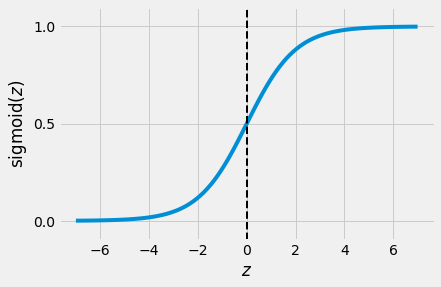

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def sigmoid(z):
    return 1./(1.+np.exp(-z))

z = np.linspace(-7, 7, 100)
plt.plot(z, sigmoid(z))
plt.axvline(0., color='black', ls='--', lw=2)
plt.xlabel('$z$')
plt.ylabel('sigmoid($z$)')
plt.ylim(-0.1, 1.1)
plt.yticks([0., 0.5, 1.]);

In [ ]:
import pandas as pd

df = pd.read_csv('Pokemon_894_13.csv')
df['hasType2'] = df['Type2'].notnull().astype(int)
print('雙屬性的數量：', df['hasType2'].sum())
print('單屬性的數量：', df.shape[0]-df['hasType2'].sum())
df.tail(3)

雙屬性的數量： 473
單屬性的數量： 421


,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
891,805,壘磊石,Rock,Steel,61,131,211,53,101,13,7,False,1
892,806,砰頭小丑,Fire,Ghost,53,127,53,151,79,107,7,False,1
893,807,捷拉奧拉,Electric,NaN,88,112,75,102,80,143,7,False,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('|雙屬性|/|訓練集| =', y_train.sum()/y_train.size)
print('|雙屬性|/|測試集| =', y_test.sum()/y_test.size)

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

|雙屬性|/|訓練集| = 0.5134328358208955
|雙屬性|/|測試集| = 0.5758928571428571


0.6026785714285714

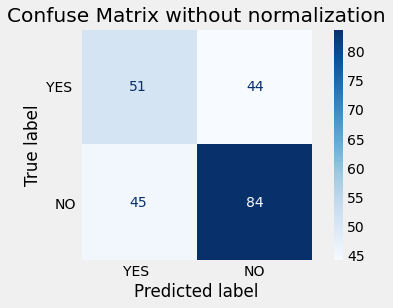

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['YES ', 'NO']
disp = plot_confusion_matrix(logit, X_test, y_test, 
                             display_labels=class_names, 
                             cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid()

In [ ]:
from sklearn.model_selection import cross_val_score

# 進行 k 次交叉驗證(default k=5)
cvs = cross_val_score(logit, X_test, y_test, scoring='accuracy')
print(cvs, '\n', cvs.mean())

[0.51111111 0.71111111 0.55555556 0.57777778 0.54545455] 
 0.5802020202020202


In [ ]:
cvs = cross_val_score(logit, X_test, y_test, scoring='f1')
print(cvs, '\n', cvs.mean())

[0.62068966 0.77966102 0.61538462 0.6779661  0.61538462] 
 0.6618172009171425


scikit-learn 提供的F1分數有以下幾種：
- f1: 二元分類使用
- f1_macro: 計算每個分類F1分數的平均，每個類別的權重相等
- f1_weighted: 計算每個分類F1分數的平均，類別權重依該類別大小而定
- f1_micro: 不區分類別，直接使用整體的精確度與召回率按公式計算

In [ ]:
from sklearn.metrics import classification_report

# 產生分類報告
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53        95
           1       0.66      0.65      0.65       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



In [ ]:
# 依預測機率調整輸出的類別
prob = logit.predict_proba(X_test)

# 設定機率門檻值，傾向預測為類別1
y_pred2 = [0 if p[0] > 0.6 else 1 for p in prob]
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.58      0.20      0.30        95
           1       0.60      0.89      0.72       129

    accuracy                           0.60       224
   macro avg       0.59      0.55      0.51       224
weighted avg       0.59      0.60      0.54       224



In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# 先做標準化
scalar = StandardScaler().fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

# 預設從 1e-4 ~ 1e4 間產生 10 個 C 值進行交叉驗證
clf = LogisticRegressionCV(Cs=10, cv=5, penalty='l2')
clf.fit(X_train_std, y_train)
print('最佳 C 值：', clf.C_)
y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))

最佳 C 值： [0.35938137]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        95
           1       0.67      0.65      0.66       129

    accuracy                           0.61       224
   macro avg       0.60      0.60      0.60       224
weighted avg       0.61      0.61      0.61       224



### 3-4 支援向量機

#### 3-4-1 線性支援向量機

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

df = pd.read_csv('Pokemon_894_13.csv')
df['hasType2'] = df['Type2'].notnull().astype(int)
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

# 建立 SVM 分類器，設定最大回合數以增加收斂機會
svm = LinearSVC(max_iter=1500)
svm.fit(X_train_std, y_train)

from sklearn.metrics import classification_report
# 產生分類報告
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54        95
           1       0.66      0.65      0.66       129

    accuracy                           0.61       224
   macro avg       0.60      0.60      0.60       224
weighted avg       0.61      0.61      0.61       224



#### 3-4-1 加入核函數處理非線性分類

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=5, gamma=.01, probability=True)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        95
           1       0.67      0.67      0.67       129

    accuracy                           0.62       224
   macro avg       0.61      0.61      0.61       224
weighted avg       0.62      0.62      0.62       224



In [ ]:
# 未知寶可夢的屬性
new_poke = [[120, 50, 80, 100, 150, 90]]
new_poke_std = scale.transform(new_poke)
# 預測是否有雙屬性
print(svm.predict(new_poke_std))
# 檢視預測機率
svm.predict_proba(new_poke_std)

[1]


array([[0.43968598, 0.56031402]])

In [ ]:
# 查看支援向量
print('支援向量數目：', svm.support_vectors_.shape[0])
print('支援向量的索引值：', svm.support_[:5])
svm.support_vectors_[:2, :]

支援向量數目： 592
支援向量的索引值： [ 3  4  5  6 10]


array([[-0.37405999, -0.47353542,  0.19932389, -0.2076741 ,  0.31555353,
        -0.32148304],
       [ 0.60433716, -0.17166222, -0.12505553,  0.03957894,  1.59202932,
        -0.01581563]])

In [ ]:
df['Legendary'] = df['Legendary'].astype(int)
n_legend = df['Legendary'].sum()
n_not_legend = df.shape[0] - n_legend
print('數量比=> 神獸:非神獸 = {}:{}'.format(n_legend,n_not_legend))

數量比=> 神獸:非神獸 = 79:815


In [ ]:
# 預測是否為神獸
X, y = df.loc[:, 'HP':'Speed'], df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       197
           1       0.79      0.41      0.54        27

    accuracy                           0.92       224
   macro avg       0.85      0.70      0.74       224
weighted avg       0.91      0.92      0.90       224



In [ ]:
# 加上平衡類別的考量
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       197
           1       0.61      0.93      0.74        27

    accuracy                           0.92       224
   macro avg       0.80      0.92      0.84       224
weighted avg       0.94      0.92      0.93       224



### 3-5 樸素貝氏分類器

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))

0.6875


In [ ]:
# 未知寶可夢的屬性
new_poke = [[120, 50, 80, 100, 150, 90]]
print(clf.predict(new_poke_std))

[0]


In [ ]:
# 假設類別的機率分布，預設為原始訓練數據的分布
clf = GaussianNB(priors=[0.4, 0.6])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))

0.5416666666666667


In [ ]:
from sklearn.naive_bayes import MultinomialNB

X, y = df.loc[:, 'HP':'Speed'], df['Generation']
clf = MultinomialNB().fit(X, y)
print(clf.predict(new_poke))

[2]


### 3-6 決策樹

#### 3-6-2 決策樹分類與迴歸

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('Pokemon_894_13.csv')
df['hasType2'] = df['Type2'].notnull().astype(int)
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 建立決策樹分類器
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
# 產生分類報告
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        95
           1       0.65      0.66      0.66       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



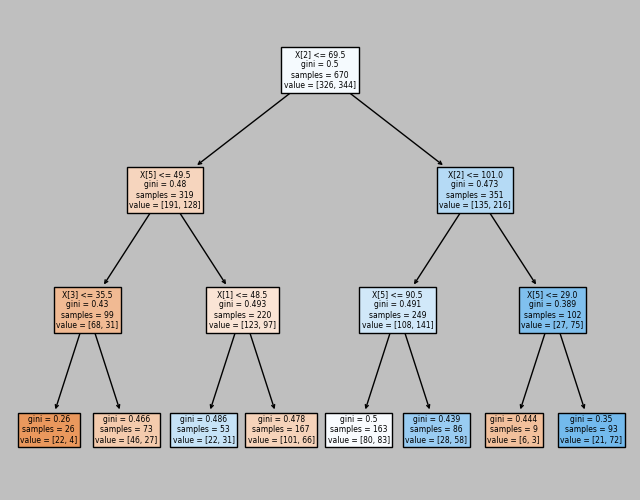

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
from sklearn.tree import plot_tree

plt.figure(dpi=100)
plot_tree(clf, filled=True);

In [ ]:
import graphviz
from sklearn import tree

# 設定輸出格式
dot_data = tree.export_graphviz(clf, out_file=None,
                feature_names=X.columns,
                class_names=['0', '1'],
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data) 
# 設定檔名
graph.render("pokemon")

'pokemon.pdf'

In [ ]:
from pydotplus import graph_from_dot_data

# 設定決策樹樹狀圖輸出格式
graph = graph_from_dot_data(dot_data)
# 輸出 .png 圖檔
graph.write_png('tree.png')
# 輸出 .pdf 檔
graph.write_pdf('tree.pdf')

True

(0.0, 6.0)

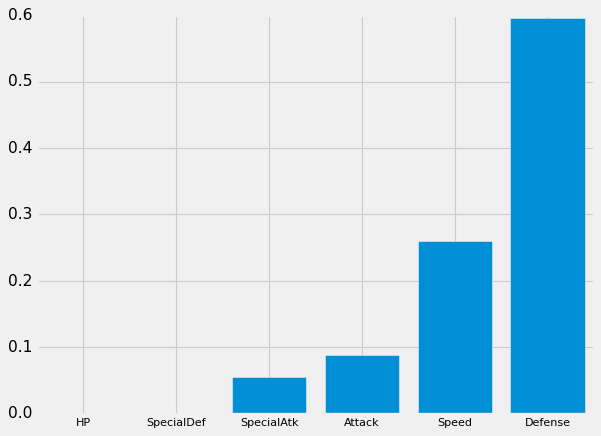

In [ ]:
import numpy as np
plt.style.use('fivethirtyeight')

# 取出特徵重要性與排序後的索引值
idx = np.argsort(clf.feature_importances_)
# 放置柱狀圖的橫軸位置
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# 由小到大繪製特徵重要性的柱狀圖
plt.bar(tree_indices, clf.feature_importances_[idx])
plt.xticks(tree_indices, labels=X.columns[idx], fontsize=10)
plt.xlim((0, len(clf.feature_importances_)))

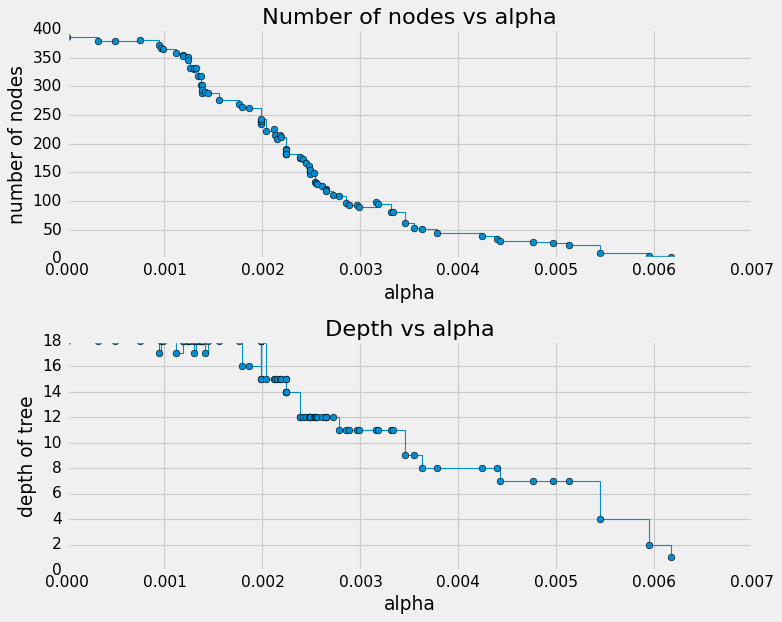

In [ ]:
# 參考來源 https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
clf = DecisionTreeClassifier()

# 依最小成本修剪方式計算修剪過程
path = clf.cost_complexity_pruning_path(X_train, y_train)
# 回傳修剪過程的有效 alpha 值
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
# 過濾掉最後只剩一個節點的決策樹
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ccp_alphas, node_counts, marker='o', lw=1, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', lw=1, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

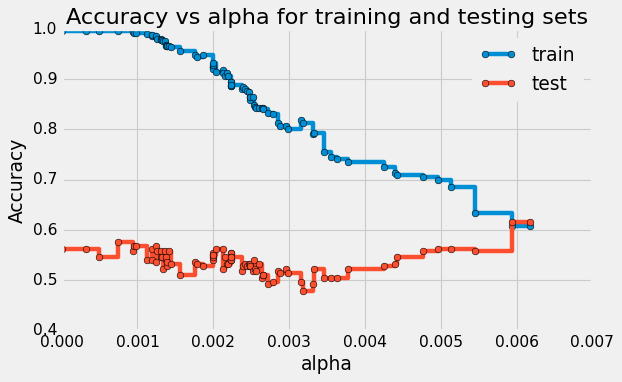

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
fig.tight_layout()

#### 3-6-3 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54        95
           1       0.66      0.63      0.64       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



(0.0, 0.6)

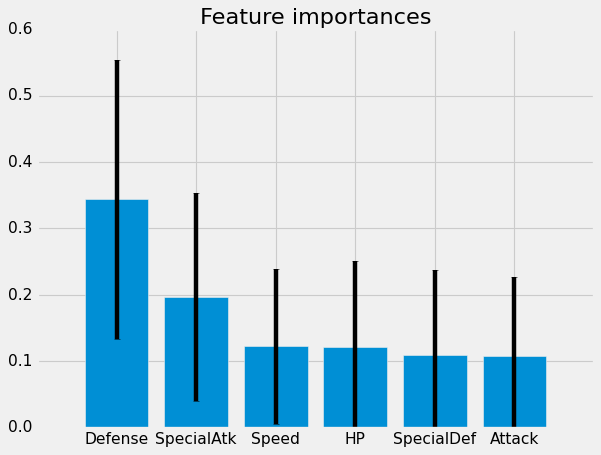

In [ ]:
importances = clf.feature_importances_
std = np.std([t.feature_importances_ for t in clf.estimators_], axis=0)
idx = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[idx], yerr=std[idx], align="center")
plt.xticks(range(X.shape[1]), labels=X.columns[idx])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.6])

In [ ]:
from sklearn.feature_selection import SelectFromModel

# 建立特徵選取器，門檻值預設為重要性的平均值
selector = SelectFromModel(clf)
selector.fit(X_train, y_train)
print('門檻值 =', selector.threshold_)
print('特徵遮罩：', selector.get_support())

# 選出新特徵，重新訓練隨機森林
X_train_new = selector.transform(X_train)
clf.fit(X_train_new, y_train)

X_test_new = selector.transform(X_test)
y_pred = clf.predict(X_test_new)
print(classification_report(y_test, y_pred))

門檻值 = 0.1666666666666667
特徵遮罩： [False False  True  True False False]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        95
           1       0.68      0.61      0.64       129

    accuracy                           0.61       224
   macro avg       0.60      0.61      0.60       224
weighted avg       0.61      0.61      0.61       224



### 3-7 K-NN

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 特徵標準化
scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
# 建立最近鄰模型
neighbors = NearestNeighbors(n_neighbors=3).fit(X_train_std)

# 未知寶可夢的屬性
new_poke = [[120, 50, 80, 100, 150, 90]]
new_poke_std = scale.transform(new_poke)
# 取出最近鄰的距離與索引值
dist, idx = neighbors.kneighbors(new_poke_std)
for d, i in enumerate(idx.ravel()):
  print(df.iloc[i, 1], np.array(X_train.iloc[i, :]), '，標準化後的距離 = %.3f'% dist[0][d])

小磁怪 [100  77  77 128 128  90] ，標準化後的距離 = 1.623
幼基拉斯 [109  53  47 127 131 103] ，標準化後的距離 = 1.642
蚊香蝌蚪 [ 95  65  65 110 130  60] ，標準化後的距離 = 1.730


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 分類器，預設 k=5
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_std, y_train)
# 輸出預測結果
print(knn.predict(new_poke_std))
# 輸出預測結果的機率
print(knn.predict_proba(new_poke_std))

[0]
[[0.6 0.4]]


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
# 建立半徑鄰分類器，設定離群值類別為 2
rn = RadiusNeighborsClassifier(radius=2, outlier_label=2)
rn.fit(X_train_std, y_train)
print(rn.predict(new_poke_std))
print(rn.predict_proba(new_poke_std))
print(rn.predict([[3., 3., 3., 1., 1., 1.]]))

[0]
[[0.57142857 0.42857143]]
[2]


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:566: UserWarning: Outlier label 2 is not in training classes. All class probabilities of outliers will be assigned with 0.
  ''.format(self.outlier_label_[k]))


# Ch 4. 模型擬合、評估與超參數調校

### 4-1 工作流程管道化

目標 : 以寶可夢的數值型特徵預測是否擁有雙屬性
新增一個hasType2欄位，標明是否有雙屬性

In [ ]:
import pandas as pd

df = pd.read_csv('Pokemon_894_12.csv')
df['hasType2'] = df['Type2'].notnull().astype(int)
print('雙屬性的數量：', df['hasType2'].sum())
print('單屬性的數量：', df.shape[0]-df['hasType2'].sum())
df.tail(3)

雙屬性的數量： 473
單屬性的數量： 421


,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
891,805,壘磊石,Rock,Steel,61,131,211,53,101,13,7,False,1
892,806,砰頭小丑,Fire,Ghost,53,127,53,151,79,107,7,False,1
893,807,捷拉奧拉,Electric,NaN,88,112,75,102,80,143,7,False,0


#### 4-1-1 轉換步驟

依下列轉換步驟進行，再以邏輯斯迴歸建模預測是否有雙屬性。

1. 切割訓練與測試集，其中測試集佔20%。
2. 挑選數值特徵與目標項間ANOVA的F值最高前兩名。

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 依 ANOVA F-Value 挑選前兩名的特徵
select = SelectKBest(f_classif, k=2).fit(X_train, y_train)
print(select.get_support())
print('挑出的特徵：', X.columns[select.get_support()])
X_train_new = select.transform(X_train)
X_train_new.shape

[False False  True  True False False]
挑出的特徵： Index(['Defense', 'SpecialAtk'], dtype='object')


(715, 2)

3. 對挑選出來的特徵進行標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train_new)
X_train_std = scale.transform(X_train_new)

X_test_new = select.transform(X_test)
X_test_std = scale.transform(X_test_new)
X_test_std[:3, :]

array([[0.86655534, 1.47194431],
       [1.03103292, 2.85717958],
       [1.03103292, 0.67158616]])

4. 利用邏輯斯迴歸建模，並對測試集進行測試，最後輸出準確率。

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='l2')
logit.fit(X_train_std, y_train)
logit.score(X_test_std, y_test)

0.6424581005586593

經過上述在前處理階段的特徵挑選、轉換與邏輯斯迴歸建模，最終得到準確率為0.64。  
接著，底下利用管道化方式將挑選、轉換與建模整合成一條龍作業。

#### 4-1-2 管道化

In [ ]:
from sklearn.pipeline import Pipeline

select = SelectKBest(f_classif, k=2)

pipe_lr = Pipeline([('selK', SelectKBest(f_classif, k=2)),
           ('sc', StandardScaler()),
           ('clf', LogisticRegression(penalty='l2'))])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)

0.6424581005586593

In [ ]:
from sklearn import set_config
set_config(display='diagram')
pipe_lr

Pipeline(steps=[('selK', SelectKBest(k=2)), ('sc', StandardScaler()),
                ('clf', LogisticRegression())])

#### 4-1-3 管道化 : 採用不同處理方式或是整合多種類型特徵的轉換步驟
1. 加入類別型特徵 Generation 的獨熱編碼
2. 從中挑選與目標項卡方值最高的前三名做為特徵
3. 與前面挑選出來的數值型特徵一併透過邏輯斯迴歸來建模

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.compose import ColumnTransformer

# 處理數值型特徵
num_features = X.columns
num_transform = Pipeline([('selK', SelectKBest(f_classif, k=2)), ('sc', StandardScaler())])
# 處理類別型特徵
cat_features = ['Generation']
cat_transform = Pipeline([('onehot', OneHotEncoder()), ('selK', SelectKBest(chi2, k=3))])
# 整合兩個處理步驟
pre = ColumnTransformer(transformers=[('num', num_transform, num_features), ('cat', cat_transform, cat_features)])
# 管道化
clf = Pipeline(steps=[('preprocessor', pre), ('clf', LogisticRegression(penalty='l2'))])

X, y = df.loc[:, 'HP':'Generation'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6256983240223464

In [ ]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('selK',
                                                                   SelectKBest(k=2)),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  Index(['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder()),
                                                                  ('selK',
                                                                   SelectKBest(k=3,
                                                                               score_func=<function chi2 at 0x00000201BE42F4C8>))]),
                                                  ['Generation'])])),
                ('clf', LogisticRegression())])

### 4-3 評估模型效能

#### 4-3-1 學習曲線與驗證曲線

In [ ]:
import warnings
# 忽略警告訊息
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv('Pokemon_894_13.csv')
df['hasType2'] = df['Type2'].notnull().astype(int)
df.take([100,200,300])

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
100,93,鬼斯通,Ghost,Poison,45,50,45,115,55,95,1,False,1
200,185,樹才怪,Rock,NaN,70,100,115,30,65,30,2,False,0
300,277,大王燕,Normal,Flying,60,85,60,50,50,125,3,False,1


In [ ]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(715, 6)
(179, 6)


In [ ]:
# 學習曲線
import numpy as np
from sklearn.model_selection import learning_curve

size = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, valid_scores = \
    learning_curve(estimator=pipe_lr,
                   X=X_train, y=y_train,
                   train_sizes=size,
                   cv=10, n_jobs=-1)
train_scores[:3, :]

array([[0.5625    , 0.5625    , 0.5625    , 0.5625    , 0.5625    ,
        0.5625    , 0.5625    , 0.5625    , 0.5625    , 0.5625    ],
       [0.5625    , 0.6015625 , 0.5625    , 0.5625    , 0.5625    ,
        0.5625    , 0.5625    , 0.5625    , 0.5625    , 0.5625    ],
       [0.60416667, 0.59375   , 0.578125  , 0.57291667, 0.57291667,
        0.57291667, 0.57291667, 0.57291667, 0.57291667, 0.57291667]])

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
valid_scores_mean[:3]

array([0.48262911, 0.52323944, 0.52746479])

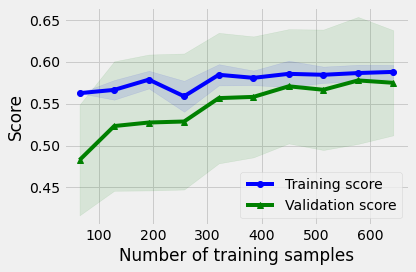

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

In [ ]:
# 驗證曲線
from sklearn.model_selection import validation_curve

param_range = np.logspace(-4, 4, 9)
train_scores, valid_scores = validation_curve(
    LogisticRegression(penalty='l1', solver='saga'), 
    X, y, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)
train_scores[:3, :]

array([[0.52860697, 0.52860697, 0.47139303, 0.52985075, 0.52919255,
        0.52919255, 0.52919255, 0.52919255, 0.52919255, 0.52919255],
       [0.52860697, 0.52985075, 0.52985075, 0.53233831, 0.53167702,
        0.53043478, 0.53043478, 0.53167702, 0.53043478, 0.53167702],
       [0.53606965, 0.5261194 , 0.55597015, 0.53233831, 0.53540373,
        0.53167702, 0.53540373, 0.54409938, 0.53540373, 0.53167702]])

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
valid_scores_mean[:3]

array([0.52240949, 0.53131086, 0.52463171])

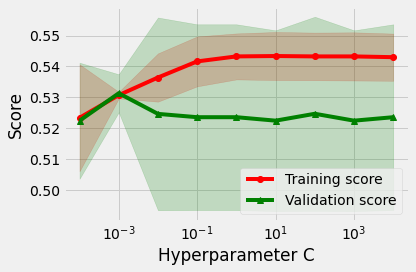

In [ ]:
plt.semilogx(param_range, train_scores_mean, 
      label="Training score", color="r", 
      marker='o')
plt.fill_between(param_range, 
        train_scores_mean-train_scores_std,
        train_scores_mean+train_scores_std, 
        alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, 
      label="Validation score", color="g", 
      marker='^')
plt.fill_between(param_range, 
        valid_scores_mean-valid_scores_std,
        valid_scores_mean+valid_scores_std, 
        alpha=0.2, color="g")
plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Score')
plt.tight_layout()

#### 4-3-2 P-R 曲線與 ROC 曲線

In [ ]:
from sklearn.metrics import average_precision_score

pipe_lr.fit(X_train, y_train)
y_score = pipe_lr.decision_function(X_test)
# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score: %.2f' %ap)

Average precision-recall score: 0.73


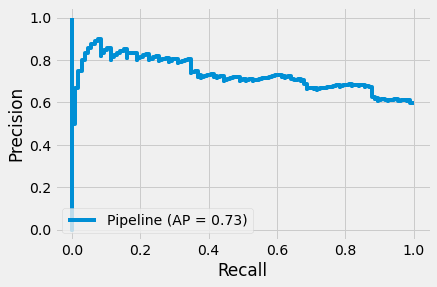

In [ ]:
# P-R 曲線
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(pipe_lr, X_test, y_test)

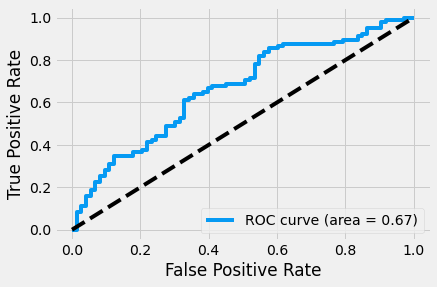

In [ ]:
# ROC 曲線
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='xkcd:azure', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### 4-4 調校超參數

#### 4-4-1 網格搜尋

In [ ]:
import warnings
# 忽略警告訊息
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('Pokemon_894_13.csv')
# 增加一個欄位，標示在 Type1、Type2 中是否有 Water 屬性
type_ = 'Water'
lst1 = [1 if x == type_ else 0 for x in df.Type1]
lst2 = [1 if x == type_ else 0 for x in df.Type2]
df[type_] = [1 if lst1[i] or lst2[i] else 0 \ for i in range(len(lst1))]
# 列出有無 Water 屬性的數量
print(df[type_].value_counts())
df.take([200,300,400])

0    754
1    140
Name: Water, dtype: int64


,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,Water
200,185,樹才怪,Rock,NaN,70,100,115,30,65,30,2,False,0
300,277,大王燕,Normal,Flying,60,85,60,50,50,125,3,False,0
400,365,帝牙海獅,Ice,Water,110,80,90,95,90,65,3,False,1


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, 'HP':'Speed'], df[type_]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(715, 6)
(179, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression

best_score = 0
# 以巢狀迴圈測試超參數組合
for p in ['l1', 'l2']:
  for c in [.001, .01, .1, 1, 10, 100]:
    # solver 改為 saga，同時應用到 L1, L2
    # max_iter 改為 1000，期待能盡量得到收斂結果
    logit = LogisticRegression(penalty=p, C=c, solver='saga', max_iter=1000)
    logit.fit(X_train, y_train)
    score = logit.score(X_test, y_test)
    
    if score > best_score:
      best_score = score
      best_param = {'penalty':p, 'C':c}

print('Best score: %.3f' % best_score)
print('Best parameters:', best_param)

Best score: 0.866
Best parameters: {'penalty': 'l1', 'C': 0.001}


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

logit = LogisticRegression(solver='saga', max_iter=1000)
penalty = ['l1', 'l2']
# 產生 10 個 C 值
C = np.logspace(-4, 2, 10)
print(C)
hyper_param = dict(C=C, penalty=penalty)

grid_s = GridSearchCV(logit, hyper_param, cv=5, verbose=1)
grid_s.fit(X_train, y_train)
print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
grid_s.score(X_test, y_test)

[1.00000000e-04 4.64158883e-04 2.15443469e-03 1.00000000e-02
 4.64158883e-02 2.15443469e-01 1.00000000e+00 4.64158883e+00
 2.15443469e+01 1.00000000e+02]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score (training): 0.8377622377622378
Best parameters (training): {'C': 0.0001, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


0.8659217877094972

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline

# 設定隨機種子(目的是得到相同的執行結果以做驗證)
np.random.seed(0)
# 建立管線，先標準化再建立 SVC
pipe_svc = Pipeline([('std', StandardScaler()), 
                     ('svc', SVC())])
# 建立管線
pipe = Pipeline([('clf', RandomForestClassifier())])
# 產生候選模型與對應的超參數
param_range = np.logspace(-4, 2, 10)
param_grid = [{'clf': [LogisticRegression()],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range},
      {'clf': [RandomForestClassifier()],
        'clf__n_estimators': [10, 100, 300, 500],
        'clf__max_depth': [3, 4, 5],
        'clf__max_features': [2, 3, 4]},
      {'clf': [pipe_svc],
        'clf__svc__C': param_range,
        'clf__svc__kernel': ['linear']},
      {'clf': [pipe_svc],
        'clf__svc__C': param_range,
        'clf__svc__gamma': param_range,
        'clf__svc__kernel': ['rbf']}]

grid_s = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_s.fit(X_train, y_train)
print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
grid_s.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 166 candidates, totalling 830 fits
Best score (training): 0.8391608391608392
Best parameters (training): {'clf': RandomForestClassifier(max_depth=4, max_features=3), 'clf__max_depth': 4, 'clf__max_features': 3, 'clf__n_estimators': 100}


[Parallel(n_jobs=1)]: Done 830 out of 830 | elapsed:  1.2min finished


0.8659217877094972

#### 4-4-2 參數搜尋小技巧

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, norm

logit = LogisticRegression(solver='saga', max_iter=1000, random_state=0)
# 產生均勻分布的樣本點
dist = dict(C=uniform(loc=0, scale=.01).rvs(100), penalty=['l2', 'l1'])
# 隨機搜尋
clf = RandomizedSearchCV(logit, dist, random_state=0, verbose=1)
rand_s = clf.fit(X_train, y_train)
print(rand_s.best_params_)
rand_s.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'penalty': 'l2', 'C': 0.002832609637559108}


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


0.8659217877094972

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV(Cs=100, cv=10, random_state=0)
logit.fit(X_train, y_train)
print('Best C:', logit.C_)
logit.score(X_test, y_test)

Best C: [0.0001]


0.8659217877094972

In [ ]:
from sklearn.model_selection import cross_val_score

# 建立網格搜尋
grid_s = GridSearchCV(estimator=pipe, 
            param_grid=param_grid, cv=2, 
            scoring='accuracy', n_jobs=-1, 
            verbose=1)
# 進行巢狀交叉驗證
scores = cross_val_score(grid_s, X_train, y_train, scoring='accuracy', cv=3)
print('CV accuracy (training): %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))
grid_s.fit(X_train, y_train)
print('Best parameters (training):', grid_s.best_params_)
grid_s.score(X_test, y_test)

Fitting 2 folds for each of 166 candidates, totalling 332 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 332 out of 332 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 166 candidates, totalling 332 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 332 out of 332 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 166 candidates, totalling 332 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 317 out of 332 | elapsed:    5.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 332 out of 332 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


CV accuracy (training): 0.838 +/- 0.002
Fitting 2 folds for each of 166 candidates, totalling 332 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 317 out of 332 | elapsed:    5.6s remaining:    0.2s


Best parameters (training): {'clf': RandomForestClassifier(max_depth=4, max_features=2, n_estimators=10), 'clf__max_depth': 4, 'clf__max_features': 2, 'clf__n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 332 out of 332 | elapsed:    6.7s finished


0.8659217877094972

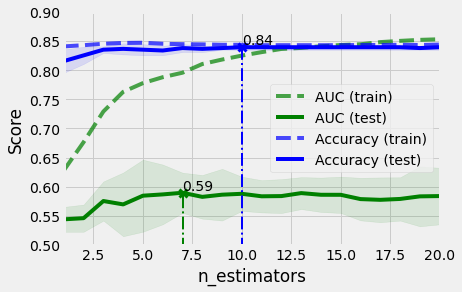

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import make_scorer, accuracy_score

# 套用兩個評分指標到網格搜尋
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(RandomForestClassifier(random_state=0),
          param_grid={'n_estimators': range(1, 21), 
                'max_depth': [4], 
                'max_features': [4]},
          scoring=scoring, refit='AUC', 
          return_train_score=True, n_jobs=-1)
gs.fit(X_train, y_train)
results = gs.cv_results_
# 取出決策樹數量作為 x 軸
X_axis = np.array(results['param_n_estimators'].data, dtype=float)
# 設定 x, y 軸刻度範圍
ax = plt.gca()
ax.set_xlim(1, 20)
ax.set_ylim(0.5, 0.9)

for scorer, color in zip(sorted(scoring), ['g', 'b']):
  for sample, style in (('train', '--'), ('test', '-')):
    # 取出不同評分指標的平均值與標準差
    sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
    sample_score_std = results['std_%s_%s' % (sample, scorer)]
    ax.fill_between(X_axis, sample_score_mean - sample_score_std, sample_score_mean + sample_score_std, alpha=0.1 if sample == 'test' else 0, color=color)
    ax.plot(X_axis, sample_score_mean, style, color=color, alpha=1 if sample == 'test' else 0.7, label="%s (%s)" % (scorer, sample))
  # 取出 test 的最佳索引值與分數
  best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
  best_score = results['mean_test_%s' % scorer][best_index]
  # 標示最大值
  ax.plot([X_axis[best_index], ] * 2, [0, best_score], lw=2, linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
  ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()

In [ ]:
type_ = 'Fire'
lst1 = [1 if x == type_ else 0 for x in df.Type1]
lst2 = [1 if x == type_ else 0 for x in df.Type2]
df[type_] = [1 if lst1[i] or lst2[i] else 0 \ for i in range(len(lst1))]
# 列出有無 Fire 屬性的數量
print(df[type_].value_counts())
df.take([170,270,370])

0    822
1     72
Name: Fire, dtype: int64


,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,Water,Fire
170,156,火岩鼠,Fire,NaN,58,64,58,80,65,80,2,False,0,1
270,250,鳳王,Fire,Flying,106,130,90,110,154,90,2,True,0,1
370,338,太陽岩,Rock,Psychic,70,95,85,55,65,70,3,False,0,0


### 4-5 處理類別不平衡

In [ ]:
X, y = df.loc[:, 'HP':'Speed'], df[type_]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)
print(y_train.value_counts())
print(y_test.value_counts())

0    663
1     52
Name: Fire, dtype: int64
0    159
1     20
Name: Fire, dtype: int64


In [ ]:
from sklearn.metrics import classification_report

pipe = Pipeline([('clf', RandomForestClassifier())])
param_range = np.logspace(-4, 2, 10)
param_grid = [{'clf': [LogisticRegression()], 
        'clf__penalty': ['l1', 'l2'], 
        'clf__C': param_range}, 
      {'clf': [RandomForestClassifier()], 
        'clf__n_estimators': [10, 20, 30, 50],
        'clf__max_depth': [3, 4, 5],
        'clf__max_features': [2, 3, 4]}]
# 評估指標為 accuracy
grid_s = GridSearchCV(estimator=pipe, cv=2, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
scores = cross_val_score(grid_s, X_train, y_train, scoring='accuracy', cv=3)
print('CV score (training): %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))
grid_s.fit(X_train, y_train)
print('Best parameters (training):', grid_s.best_params_)
y_pred = grid_s.predict(X_test)
print(classification_report(y_pred, y_test))

CV score (training): 0.926 +/- 0.002
Best parameters (training): {'clf': RandomForestClassifier(max_depth=5, max_features=2, n_estimators=10), 'clf__max_depth': 5, 'clf__max_features': 2, 'clf__n_estimators': 10}
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       179
           1       0.00      0.00      0.00         0

    accuracy                           0.89       179
   macro avg       0.50      0.44      0.47       179
weighted avg       1.00      0.89      0.94       179



In [ ]:
from sklearn.metrics import classification_report

pipe = Pipeline([('clf', RandomForestClassifier())])
param_range = np.logspace(-4, 2, 10)
# 加入 class_weight 參數
param_grid = [{'clf': [LogisticRegression()], 
        'clf__penalty': ['l1', 'l2'], 
        'clf__C': param_range, 
        'clf__class_weight': ['balanced']}, 
      {'clf': [RandomForestClassifier()], 
        'clf__n_estimators': [10, 20, 30, 50],
        'clf__max_depth': [3, 4, 5],
        'clf__max_features': [2, 3, 4], 
        'clf__class_weight': ['balanced']}]

grid_s = GridSearchCV(estimator=pipe, cv=2, n_jobs=-1, param_grid=param_grid, scoring='recall')
scores = cross_val_score(grid_s, X_train, y_train, scoring='recall', cv=3)
print('CV score (training): %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))
grid_s.fit(X_train, y_train)
print('Best parameters (training):', grid_s.best_params_)
y_pred = grid_s.predict(X_test)
print(classification_report(y_pred, y_test))

CV score (training): 0.709 +/- 0.088
Best parameters (training): {'clf': LogisticRegression(C=0.0001, class_weight='balanced'), 'clf__C': 0.0001, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.62      0.93      0.75       106
           1       0.65      0.18      0.28        73

    accuracy                           0.63       179
   macro avg       0.64      0.56      0.51       179
weighted avg       0.63      0.63      0.56       179



In [ ]:
from sklearn.utils import resample

print(y_train.value_counts())
# 對類別 1 進行放回式取樣
size = y_train[y_train == 0].shape[0]
X_up, y_up = resample(X_train[y_train == 1], 
            y_train[y_train == 1], 
            replace=True, 
            n_samples=size, 
            random_state=0)
X_train_up = np.vstack((X_train[y_train==0], X_up))
y_train_up = np.hstack((y_train[y_train==0], y_up))
print('Class 0:', len(y_train_up) - y_train_up.sum())
print('Class 1:', y_train_up.sum())

0    663
1     52
Name: Fire, dtype: int64
Class 0: 663
Class 1: 663


In [ ]:
# 邏輯斯迴歸擬合類別不平衡數據
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       179
           1       0.00      0.00      0.00         0

    accuracy                           0.89       179
   macro avg       0.50      0.44      0.47       179
weighted avg       1.00      0.89      0.94       179



In [ ]:
# 邏輯斯迴歸加上 class_weight='balanced'
logit = LogisticRegression(class_weight='balanced')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       109
           1       0.65      0.19      0.29        70

    accuracy                           0.64       179
   macro avg       0.65      0.56      0.53       179
weighted avg       0.64      0.64      0.58       179



In [ ]:
# 邏輯斯迴歸擬合經過上取樣的數據
logit = LogisticRegression()
logit.fit(X_train_up, y_train_up)
y_pred = logit.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77       112
           1       0.65      0.19      0.30        67

    accuracy                           0.66       179
   macro avg       0.66      0.57      0.54       179
weighted avg       0.66      0.66      0.60       179



# Ch 5. 非監督式學習 : 降維與分群

### 5-1 主成份分析

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

df = pd.read_csv('Pokemon_894_12.csv')
df.head(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False


In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler

cols = ['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed']
scaler = StandardScaler().fit(df[cols])
cols_std = scaler.transform(df[cols])
df_std = pd.DataFrame(cols_std, columns=cols)
df_std.describe()

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
count,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02
mean,2.429079e-16,3.303348e-17,-1.065283e-16,2.583069e-17,-1.154930e-17,-4.570046e-17
std,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00
min,-2.668698e+00,-2.290872e+00,-2.217458e+00,-1.916752e+00,-1.874986e+00,-2.160820e+00
25%,-7.588604e-01,-7.605427e-01,-7.800513e-01,-7.079864e-01,-8.015527e-01,-7.941122e-01
50%,-1.352399e-01,-1.484111e-01,-1.412039e-01,-2.546993e-01,-8.593067e-02,-1.107584e-01
75%,4.104281e-01,6.167534e-01,4.976436e-01,6.518748e-01,6.296913e-01,7.434340e-01
max,7.231278e+00,3.371345e+00,4.969576e+00,3.643570e+00,5.639045e+00,3.818526e+00


In [ ]:
# 進行 PCA
from sklearn.decomposition import PCA

num_pc = 2
pca = PCA(n_components=num_pc)
pca.fit(df_std)

loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(num_pc)]
loadings

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
PC1,0.393787,0.443033,0.369369,0.457304,0.445262,0.323783
PC2,0.039396,-0.034400,0.619764,-0.293366,0.275120,-0.671865


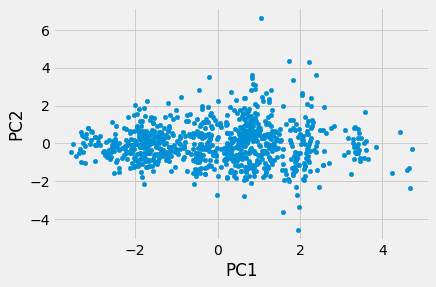

In [ ]:
pc_scores = pd.DataFrame(pca.transform(df_std))
pc_scores.columns = ['PC'+str(i+1) for i in range(num_pc)]
pc_scores.plot(kind='scatter', x='PC1', y='PC2');

In [ ]:
num_pc = 6
pca = PCA(n_components=num_pc)
pca.fit(df_std)
print(pca.explained_variance_) # 特徵值
print(pca.explained_variance_ratio_) # 解釋變異比例

[2.70133767 1.12469922 0.78692388 0.71251463 0.42096102 0.26028251]
[0.44971934 0.18724019 0.13100727 0.11861961 0.07008169 0.04333189]


In [ ]:
pca = PCA(n_components=0.8) # 解釋 80% 的變異
pca.fit(df_std)
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_)

loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(pca.n_components_)]
loadings

[2.70133767 1.12469922 0.78692388 0.71251463]
[0.44971934 0.18724019 0.13100727 0.11861961]


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
PC1,0.393787,0.443033,0.369369,0.457304,0.445262,0.323783
PC2,0.039396,-0.034400,0.619764,-0.293366,0.275120,-0.671865
PC3,-0.485325,-0.578250,0.033621,0.332590,0.552728,0.113274
PC4,0.710255,-0.415154,-0.406510,0.168762,0.176726,-0.313404


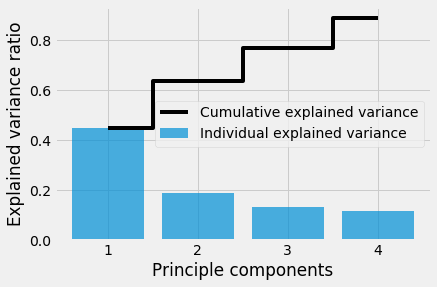

In [ ]:
import numpy as np

var = np.array(pca.explained_variance_ratio_)
cum_var = np.cumsum(var)
plt.bar(range(1, len(var)+1), var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var)+1), cum_var, where='mid', color='k', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend();

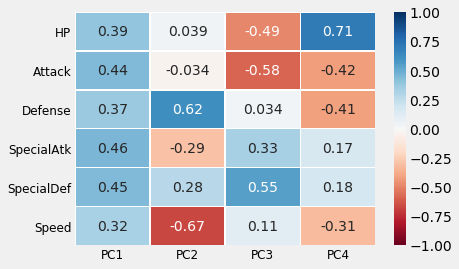

In [ ]:
import seaborn as sns

ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontsize=12);

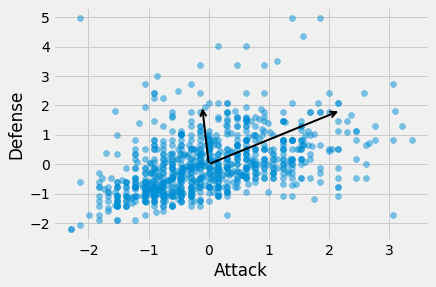

In [ ]:
# 設定箭頭參數
arrow_props = dict(arrowstyle='->', linewidth='2', color='k')

def draw_arrow(v0, v1):
  plt.gca().annotate('', v1, v0, arrowprops=arrow_props)
    
plt.scatter(df_std['Attack'], df_std['Defense'], alpha=.5)

# 以箭頭顯示 PC1 與 PC2
for len_, vec in zip(pca.explained_variance_[:2], pca.components_[:2]):
  v = vec[1:3]*3*np.sqrt(len_)
  draw_arrow(pca.mean_[1:3], pca.mean_[1:3] + v)
    
plt.xlabel('Attack')
plt.ylabel('Defense');

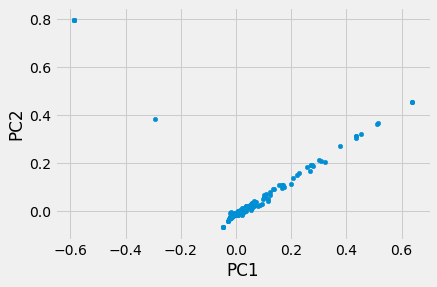

In [ ]:
# 進行 KPCA (rbf)
from sklearn.decomposition import KernelPCA

num_pc = 2
kpca = KernelPCA(n_components=num_pc, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(df_std)

pc_scores = pd.DataFrame(X_kpca)
pc_scores.columns = ['PC'+str(i+1) for i in range(num_pc)]
pc_scores.plot(kind='scatter', x='PC1', y='PC2');

In [ ]:
clt_1, clt_2 = [], [] 
for idx in pc_scores.index:
  if pc_scores.iloc[idx, 1] > 0.7:
    clt_1.append(df.iloc[idx, 1])
  elif (-0.4 < pc_scores.iloc[idx, 0] < -0.2):
    clt_2.append(df.iloc[idx, 1])
        
print(clt_1)
print(clt_2)

['夢幻', '時拉比', '基拉祈', '瑪納霏', '謝米-Land', '比克提尼']
['銀伴戰獸']


### 5-2 k-means 分群

#### 5-2-1 建立 k-means 分群

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Pokemon_894_12.csv')

# 對寶可夢兩個屬性的 SpecialAtk, SpecialDef 進行分群
t1, t2 = 'Bug', 'Psychic'
df_clf = df[(df['Type1']==t1) | (df['Type1']==t2)]
df_clf = df_clf[['Type1','SpecialAtk', 'SpecialDef']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['Type1']==t1]
idx_1 = [df_clf['Type1']==t2]

# 標準化
X = df_clf[['SpecialAtk', 'SpecialDef']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std[:2, :])

[[-1.39076263 -1.66670756]
 [-1.26781386 -1.51507461]]


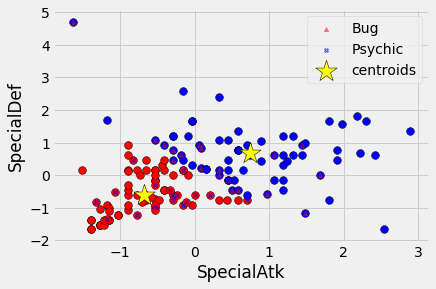

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random')
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
  # 設定顏色
  c1, c2 = 'red', 'blue' 
  plt.scatter(X_std[y_pred==0, 0], X_std[y_pred==0, 1], color=c1, edgecolor='k', s=60)
  plt.scatter(X_std[y_pred==1, 0], X_std[y_pred==1, 1], color=c2, edgecolor='k', s=60)
  if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
    c1, c2 = 'blue', 'red'  
  plt.scatter(X_std[idx_0[0], 0], X_std[idx_0[0], 1], color=c1, marker='^', alpha=.5, s=20, label=t1)
  plt.scatter(X_std[idx_1[0], 0], X_std[idx_1[0], 1], color=c2, marker='X', alpha=.5, s=20, label=t2)
  plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=500, marker='*', c='yellow', edgecolor='black', label='centroids')
  plt.xlabel('SpecialAtk')
  plt.ylabel('SpecialDef')
  plt.legend()

plt_scatter(X_std, y_pred, km)

#### 5-2-2 評估分群結果

上圖針對寶可夢的兩個屬性進行 k-means 分群，並將結果繪製成散點圖。
因為已經知道是兩個屬性的分群，所以設定 k=2 (n_clusters=2)。
圖中藍色與紅色圈圈顯示兩個分群的結果，且進一步以藍色三角形標示 Bug 屬性，以紅色叉叉標示 Psychic 屬性。
換言之，只要圈圈的顏色有異常，即代表分群錯誤。

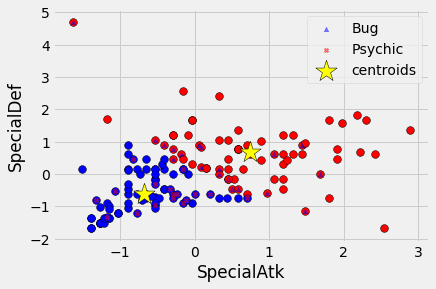

In [ ]:
km = KMeans(n_clusters=2, init='k-means++')
y_pred = km.fit_predict(X_std)
plt_scatter(X_std, y_pred, km)

In [ ]:
# 對寶可夢兩個屬性的 SpecialAtk, SpecialDef 進行分群
lst_type = ['Fairy', 'Fighting', 'Steel', 'Ice']
df_clf = df[df['Type1']==lst_type[0]]

for i in range(1, len(lst_type)):
  df_clf = df_clf.append(df[df['Type1']==lst_type[i]])

X = df_clf[['SpecialAtk', 'SpecialDef']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
X.shape

(102, 2)

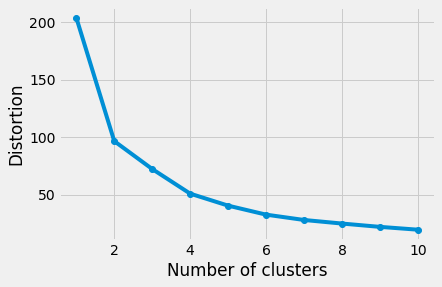

In [ ]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit(X_std)
  lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

n_clusters = 2 ，所有樣本的輪廓係數平均 = 0.48203536275839154
n_clusters = 4 ，所有樣本的輪廓係數平均 = 0.3917905617415923


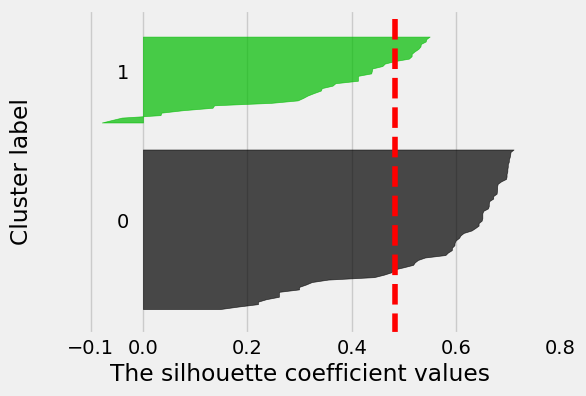

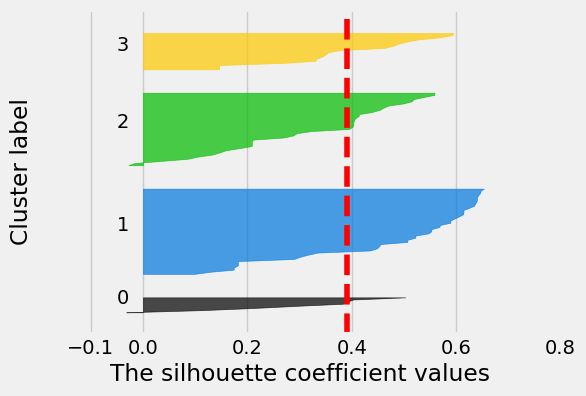

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in [2, 4]:
  fig, ax = plt.subplots(1, 1, dpi=100)
  # 雖然輪廓係數範圍是[-1, 1]，但這裡只顯示[-0.2, 0.8]之間
  ax.set_xlim([-.2, .8])
  ax.set_ylim([0, len(X_std)+(n_clusters+1)*10])
  # 建立 k-means 模型並擬合數據
  km = KMeans(n_clusters=n_clusters, random_state=0)
  y_pred = km.fit_predict(X_std)
  # 取出分群結果的標籤
  labels = np.unique(y_pred)
  # 計算所有樣本的輪廓係數平均值
  silhouette_avg = silhouette_score(X_std, y_pred)
  print("n_clusters =", n_clusters, "，所有樣本的輪廓係數平均 =", silhouette_avg)
  # 計算每個樣本的輪廓係數
  silhouette = silhouette_samples(X_std, y_pred, metric='euclidean')
  y_lower = 10
  for i, c in enumerate(labels):
    c_silhouette = silhouette[y_pred == c]
    c_silhouette.sort()
    size_cluster_i = c_silhouette.shape[0]
    y_upper = y_lower + size_cluster_i
    # 產生顏色編號，並填入區間內
    color = cm.nipy_spectral(float(i)/n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, c_silhouette, facecolor=color, edgecolor=color, alpha=0.7)
    # 標示集群標籤
    ax.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
    y_lower = y_upper + 10
      
  ax.set_xlabel("The silhouette coefficient values")
  ax.set_ylabel("Cluster label")
  
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax.set_yticks([])
  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

### 5-3 階層式分群

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

df = pd.read_csv('Pokemon_894_12.csv')

# 取出前 20 隻寶可夢進行凝聚分群
df_X = df[df.index < 20]
df_X.shape

(20, 12)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters=4)
cls.fit(df_X.loc[:, 'HP':'Speed'])
cls.labels_

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 3, 3, 1, 2],
      dtype=int64)

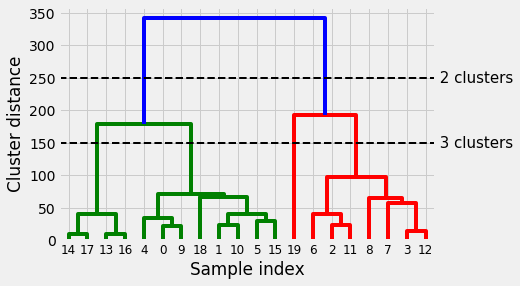

In [ ]:
from scipy.cluster import hierarchy

X = df_X.loc[:, 'HP':'Speed']
model = hierarchy.linkage(X, 'ward')

# 繪製樹狀圖
hierarchy.dendrogram(model, orientation="top", labels=df_X.index)
plt.xlabel("Sample index")
plt.ylabel('Cluster distance')

# 標示橫切線
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [250, 250], '--', c='k', lw=2)
ax.text(bounds[1], 250, ' 2 clusters', va='center', fontdict={'size':15})
ax.plot(bounds, [150, 150], '--', c='k', lw=2)
ax.text(bounds[1], 150, ' 3 clusters', va='center', fontdict={'size':15});

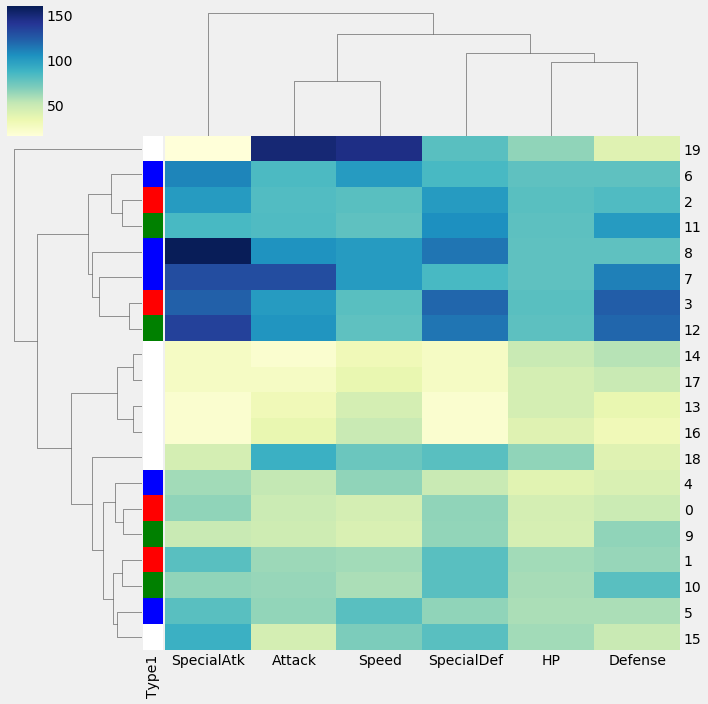

In [ ]:
import seaborn as sns

# 標示 Type1
lut = dict(zip(df_X['Type1'].unique(), "rbg"))
row_colors = df_X['Type1'].map(lut)
g = sns.clustermap(X, cmap='YlGnBu', row_colors=row_colors)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

### 5-4 DBSCAN 分群

In [ ]:
from sklearn.cluster import DBSCAN

# 取出前 100 隻寶可夢進行分群
X = df.loc[df.index < 100, 'HP':'Speed']
clf = DBSCAN(eps=35, min_samples=3).fit(X)
clf.labels_

array([ 0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1,  2, -1, -1,  0,  0,  0, -1,  0,  1, -1, -1,  0,  0,
        2, -1, -1, -1, -1,  0,  0,  0,  0,  0,  2, -1,  1, -1, -1],
      dtype=int64)

In [ ]:
pd.Series(clf.labels_).value_counts()

 0    69
-1    25
 1     3
 2     3
dtype: int64

### 5-5 鄰近傳播法

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

X = df.loc[df.index < 100, 'HP':'Speed']
# 先標準化
X_std = StandardScaler().fit_transform(X)

clf = AffinityPropagation()
labels = clf.fit_predict(X_std)
labels

array([ 0,  1,  2,  3,  0,  1,  2,  3,  3,  0,  1,  2,  3,  5,  5,  1,  5,
        5,  7,  4,  5,  7,  6,  2,  5,  6,  5,  6,  5,  6,  5,  6, 11,  8,
        5,  7,  8,  5,  7,  8,  0,  2,  0,  2, 13, 13,  5,  6,  0,  1,  2,
        0,  1,  7,  1,  5,  6,  5,  6,  0,  2,  7,  6,  7,  8,  5,  7,  8,
        9,  9, 10, 10, 13, 13,  8,  7,  7,  2,  0,  2, 11, 11,  8,  6,  6,
       13,  8, 12,  0,  1,  7,  5,  6,  0,  8, 13,  8, 11, 14,  9],
      dtype=int64)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

y = df.loc[df.index < 100, 'Type1']
adjusted_rand_score(y, labels)

0.05337575775995288

# Ch 6. 集成學習

### 6-1 以袋裝法集思廣益(Bagging)

In [ ]:
import pandas as pd

df = pd.read_csv('Pokemon_894_12.csv')
df['hasType2'] = [0 if x else 1 for x in df['Type2'].isna()]
df.head(5)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False,1
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False,1
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False,1
3,3,妙蛙花Mega,Grass,Poison,80,100,123,122,120,80,1,False,1
4,4,小火龍,Fire,NaN,39,52,43,60,50,65,1,False,0


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape

(670, 6)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {'KNN': KNeighborsClassifier(n_neighbors=3), 
      'bagging': BaggingClassifier(KNeighborsClassifier(n_neighbors=3), 
      n_estimators=3, 
      max_samples=.8, 
      max_features=.8, 
      n_jobs=-1, 
      random_state=0)}
scores = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    scores[(name, 'Train score')] = clf.score(X_train, y_train)
    scores[(name, 'Test score')] = clf.score(X_test, y_test)
    
pd.Series(scores).unstack()

,Test score,Train score
KNN,0.562500,0.804478
bagging,0.580357,0.722388


### 6-2 以提升法互補有無(Boosting)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

models = {'Decision Tree': DecisionTreeClassifier(max_depth=1), 
      'AdaBoost': AdaBoostClassifier(n_estimators=3, 
      random_state=0)}

scores = {}
for name, clf in sorted(models.items(), key=lambda x:x[0], reverse=True):
    clf.fit(X_train, y_train)
    scores[(name, 'Train score')] = clf.score(X_train, y_train)
    scores[(name, 'Test score')] = clf.score(X_test, y_test)
    
pd.Series(scores).unstack().sort_index(ascending=False)

,Test score,Train score
Decision Tree,0.616071,0.607463
AdaBoost,0.633929,0.607463


In [ ]:
X_r, y_r = df.loc[:, 'Attack':'Speed'], df['HP']
X_r_train, X_r_test, y_r_train, y_r_test = \
    train_test_split(X_r, y_r, test_size=0.25, random_state=0)
X_r_train.shape

(670, 5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

reg = DecisionTreeRegressor(max_depth=3)
models = {'Decision Tree': reg, 
      'AdaBoost': AdaBoostRegressor(reg, learning_rate=.01, 
      random_state=0)}

scores = {}
for name, clf in sorted(models.items(), key=lambda x:x[0], reverse=True):
    clf.fit(X_r_train, y_r_train)
    scores[(name, 'Train score')] = clf.score(X_r_train, y_r_train)
    scores[(name, 'Test score')] = clf.score(X_r_test, y_r_test)
    
pd.Series(scores).unstack().sort_index(ascending=False)

,Test score,Train score
Decision Tree,0.226408,0.413383
AdaBoost,0.339387,0.446392


### 6-3 以堆疊法兼容並蓄(Stacking)

#### Voting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()

en_clf1 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('nb', clf3)], 
                           voting='hard')

en_clf1.fit(X_train, y_train)
en_clf1.predict(X_test)[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [ ]:
# 記錄準確率
scores = {}
name = 'Voting (hard)'
scores[(name, 'Train score')] = en_clf1.score(X_train, y_train)
scores[(name, 'Test score')] = en_clf1.score(X_test, y_test)

# 取出每個模型的分類結果
print('真實類別：', y_test[:10].values)
print('邏輯斯迴歸分類結果：', en_clf1.named_estimators_['lr'].predict(X)[:10])
print('隨機森林分類結果：', en_clf1.named_estimators_['rf'].predict(X)[:10])

真實類別： [1 1 0 0 1 1 1 0 0 1]
邏輯斯迴歸分類結果： [0 0 1 1 0 0 1 1 1 0]
隨機森林分類結果： [1 0 1 1 0 0 1 1 1 0]


In [ ]:
en_clf2 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                           voting='soft')
en_clf2.fit(X_train, y_train)
en_clf2.predict(X_test)[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
name = 'Voting (soft)'
scores[(name, 'Train score')] = en_clf2.score(X_train, y_train)
scores[(name, 'Test score')] = en_clf2.score(X_test, y_test)

# 取出每個模型的預測機率
prob = en_clf2.transform(X_test)
print('真實類別：', y_test.iloc[0])
print('邏輯斯迴歸分類機率：', prob[0][:2])
print('隨機森林分類機率：', prob[0][2:4])
print('單純貝氏分類機率：', prob[0][4:])

真實類別： 1
邏輯斯迴歸分類機率： [0.35726441 0.64273559]
隨機森林分類機率： [0.42716667 0.57283333]
單純貝氏分類機率： [0.43394856 0.56605144]


In [ ]:
en_clf3 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                           voting='soft', weights=[2,1,1])
en_clf3.fit(X_train, y_train)
en_clf3.predict(X_test)[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
name = 'Voting (soft + weight)'
scores[(name, 'Train score')] = en_clf3.score(X_train, y_train)
scores[(name, 'Test score')] = en_clf3.score(X_test, y_test)

pd.Series(scores).unstack().sort_index(ascending=True)

,Test score,Train score
Voting (hard),0.589286,0.661194
Voting (soft + weight),0.598214,0.791045
Voting (soft),0.607143,0.849254


#### Stacking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(max_depth=7, random_state=0)
clf3 = GaussianNB()

lr = LogisticRegression()
estimators = [('K-NN', clf1), ('rf', clf2), ('nb', clf3)]
sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr, n_jobs=-1)
titles = ('K-NN', 'Random Forest', 'Naive Bayes',
          'Stacking')

models = (clf1, clf2, clf3, sclf)
models = [clf.fit(X_train, y_train) for clf in models]

scores = {}
for clf, title in zip(models, titles):
    scores[(title, 'Train score')] = clf.score(X_train, y_train)
    scores[(title, 'Test score')] = clf.score(X_test, y_test)

pd.Series(scores).unstack().sort_index(ascending=True)

,Test score,Train score
K-NN,0.575893,0.995522
Naive Bayes,0.611607,0.576119
Random Forest,0.562500,0.888060
Stacking,0.620536,0.907463


In [ ]:
for i, est in enumerate(estimators):
    print(est[0], '的權重 =', sclf.final_estimator_.coef_[0][i])

K-NN 的權重 = 0.4070787575559543
rf 的權重 = 0.8704445947940478
nb 的權重 = 0.9177966370470659


In [ ]:
# 繪製學習曲線
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=sclf, X=X_train, y=y_train, 
                   train_sizes=np.linspace(0.1, 1.0, 10), 
                   cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
test_mean

array([0.49104478, 0.50149254, 0.52985075, 0.51791045, 0.57014925,
       0.57761194, 0.58208955, 0.59850746, 0.60149254, 0.60298507])

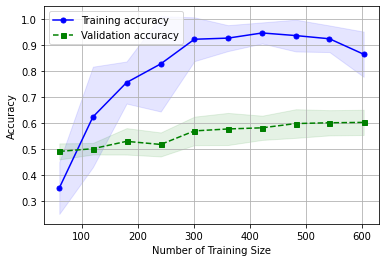

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean, color='blue', marker='o', 
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, 
                 train_mean + train_std, 
                 train_mean - train_std, 
                 alpha=.1, color='blue')
plt.plot(train_sizes, test_mean, color='green', ls='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, 
                 test_mean + test_std, 
                 test_mean - test_std, 
                 alpha=.1, color='green')
plt.grid()
plt.xlabel('Number of Training Size')
plt.ylabel('Accuracy')
plt.legend();